In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style
%matplotlib inline
import seaborn as sns; sns.set() # for plot styling
from scipy import stats
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from scipy.stats import zscore
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
election= pd.read_excel("Election_Data.xlsx",sheet_name="Election_Dataset_Two Classes",index_col=0)

In [3]:
election.head(10)

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1,Labour,43,3,3,4,1,2,2,female
2,Labour,36,4,4,4,4,5,2,male
3,Labour,35,4,4,5,2,3,2,male
4,Labour,24,4,2,2,1,4,0,female
5,Labour,41,2,2,1,1,6,2,male
6,Labour,47,3,4,4,4,4,2,male
7,Labour,57,2,2,4,4,11,2,male
8,Labour,77,3,4,4,1,1,0,male
9,Labour,39,3,3,4,4,11,0,female
10,Labour,70,3,2,5,1,11,2,male


In [7]:
election.shape

(1525, 9)

In [8]:
election.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [9]:
election.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1525 entries, 1 to 1525
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 119.1+ KB


In [10]:
election.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [16]:
replace = {
    "gender" : {"male" : 1 , "female" : 0},
    "vote"  :  { "Conservative" : 1, "Labour" : 0}
}

In [17]:
election = election.replace(replace)

In [10]:
election["gender"].value_counts()

0    812
1    713
Name: gender, dtype: int64

In [51]:

election["vote"].value_counts()

0    1057
1     460
Name: vote, dtype: int64

In [15]:
data = election[election.duplicated()]
data.head(1525)

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
68,0,35,4,4,5,2,3,2,1
627,0,39,3,4,4,2,5,2,1
871,0,38,2,4,2,2,4,3,1
984,1,74,4,3,2,4,8,2,0
1155,1,53,3,4,2,2,6,0,0
1237,0,36,3,3,2,2,6,2,0
1245,0,29,4,4,4,2,2,2,0
1439,0,40,4,3,4,2,2,2,1


In [14]:
election=election.drop_duplicates()

In [13]:
# data = election[election.duplicated()]
# data.head(1525)

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender


In [18]:
election.skew()

vote                       0.857014
age                        0.139800
economic.cond.national    -0.238474
economic.cond.household   -0.144148
Blair                     -0.539514
Hague                      0.146191
Europe                    -0.141891
political.knowledge       -0.422928
gender                     0.130929
dtype: float64

In [27]:
election.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 1 to 1525
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   vote                     1517 non-null   int64
 1   age                      1517 non-null   int64
 2   economic.cond.national   1517 non-null   int64
 3   economic.cond.household  1517 non-null   int64
 4   Blair                    1517 non-null   int64
 5   Hague                    1517 non-null   int64
 6   Europe                   1517 non-null   int64
 7   political.knowledge      1517 non-null   int64
 8   gender                   1517 non-null   int64
dtypes: int64(9)
memory usage: 118.5 KB


In [20]:
election.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [21]:
election.shape

(1517, 9)

In [22]:
election.age.describe().T

count    1517.000000
mean       54.241266
std        15.701741
min        24.000000
25%        41.000000
50%        53.000000
75%        67.000000
max        93.000000
Name: age, dtype: float64

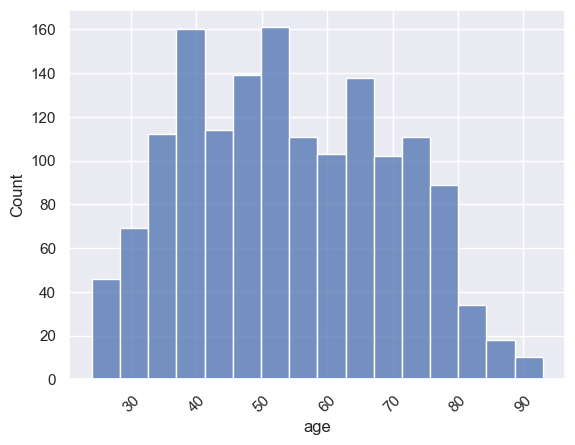

In [28]:
# fig, axes = plt.subplots(nrows=1,ncols=2)
# sns.distplot(election['age'], kde=True, ax=axes[0][0])
# sns.boxplot(x='age', data=election, ax=axes[0][1])
# plt.show()

#fig, axes=plt.subplots(nrows=1, ncols=2, figsize=(10,8))
# sns.histplot(election['age'], kde=True, ax=axes[0][0])
sns.histplot(election['age'])

#sns.boxplot(x='age', data=election, ax=axes[0][1])
# sns.histplot(data_df['No_of_children_born'], kde=True, ax=axes[1][0])
# sns.boxplot(x='No_of_children_born', data=data_df, ax=axes[1][1])
plt.xticks(rotation=45)
plt.show()

<AxesSubplot: xlabel='age'>

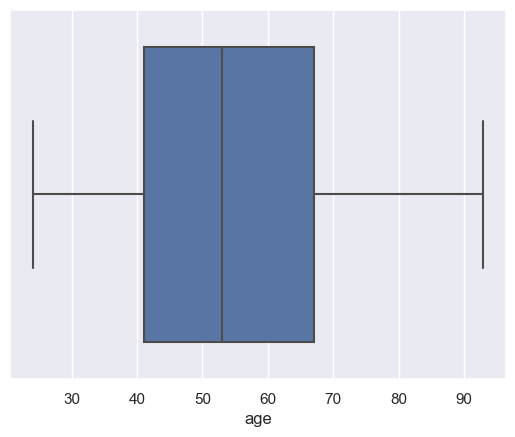

In [29]:
sns.boxplot(x='age', data=election)

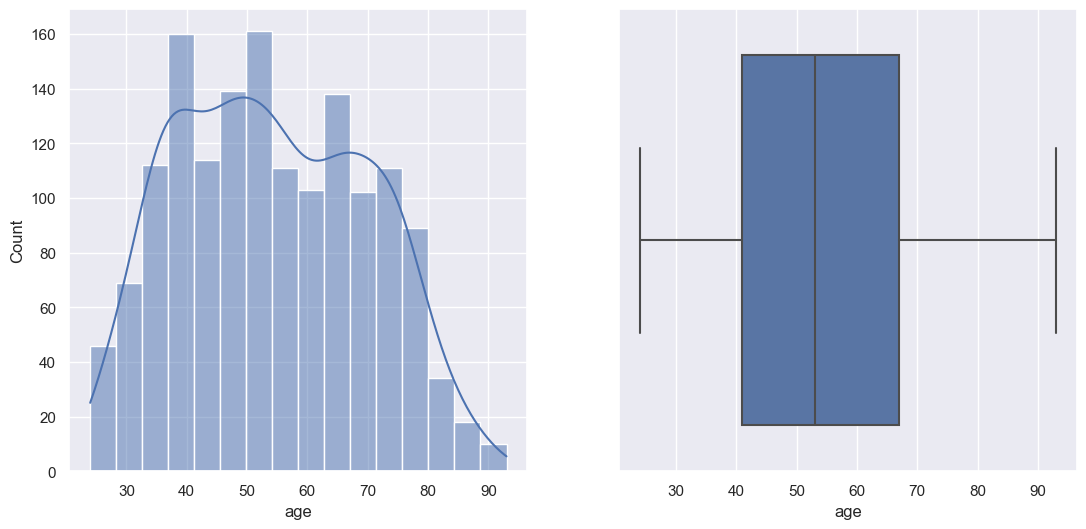

In [48]:
fig, axes=plt.subplots(nrows=1, ncols=2, figsize=(13,6))
sns.histplot(election['age'], kde=True, ax=axes[0])
sns.boxplot(x='age', data=election, ax=axes[1])
plt.show()

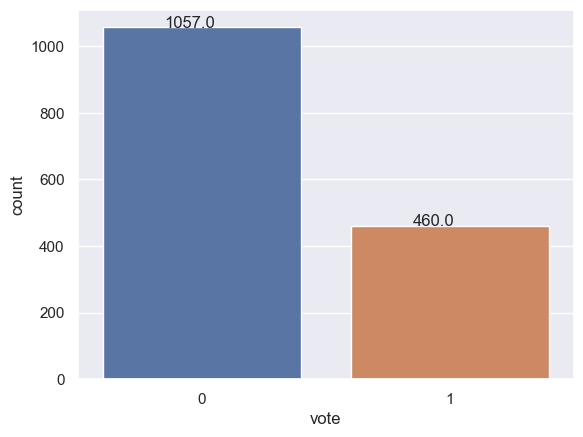

In [50]:
ax = sns.countplot(x='vote',  data=election)
for p in ax.patches:
   ax.annotate(p.get_height(), (p.get_x()+0.25, p.get_height()+0.01))

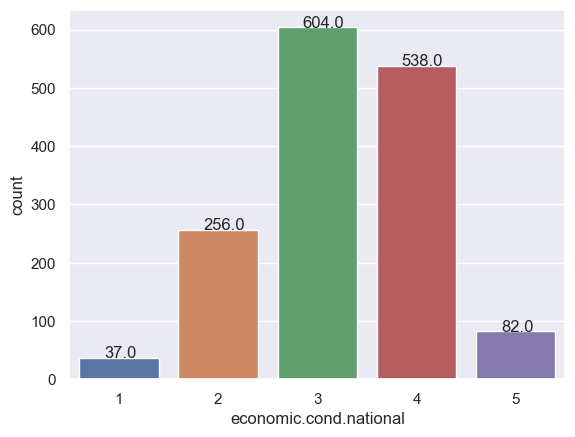

In [52]:
ax = sns.countplot(x='economic.cond.national',  data=election)
for p in ax.patches:
   ax.annotate(p.get_height(), (p.get_x()+0.25, p.get_height()+0.01))

In [55]:
election["economic.cond.national"].describe().T

count    1517.000000
mean        3.245221
std         0.881792
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: economic.cond.national, dtype: float64

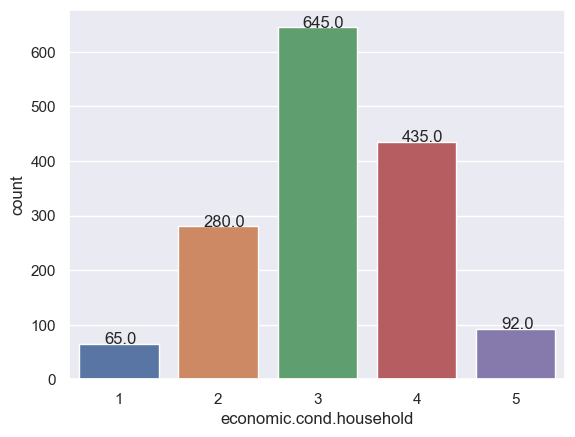

In [56]:
ax = sns.countplot(x='economic.cond.household',  data=election)
for p in ax.patches:
   ax.annotate(p.get_height(), (p.get_x()+0.25, p.get_height()+0.01))

In [57]:
election["economic.cond.household"].describe().T

count    1517.000000
mean        3.137772
std         0.931069
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: economic.cond.household, dtype: float64

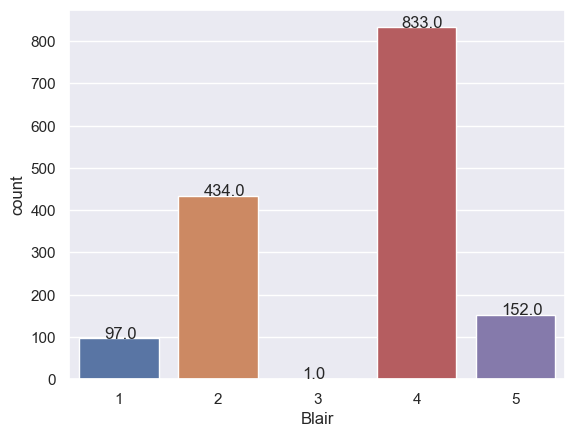

In [58]:
ax = sns.countplot(x='Blair',  data=election)
for p in ax.patches:
   ax.annotate(p.get_height(), (p.get_x()+0.25, p.get_height()+0.01))

In [59]:
election["Blair"].describe().T

count    1517.000000
mean        3.335531
std         1.174772
min         1.000000
25%         2.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: Blair, dtype: float64

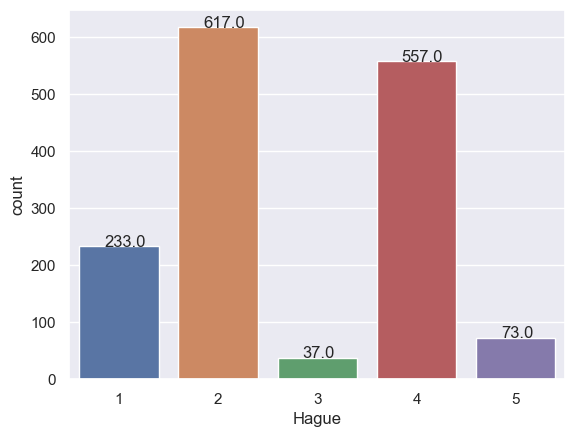

In [60]:
ax = sns.countplot(x='Hague',  data=election)
for p in ax.patches:
   ax.annotate(p.get_height(), (p.get_x()+0.25, p.get_height()+0.01))

In [61]:
election["Hague"].describe().T

count    1517.000000
mean        2.749506
std         1.232479
min         1.000000
25%         2.000000
50%         2.000000
75%         4.000000
max         5.000000
Name: Hague, dtype: float64

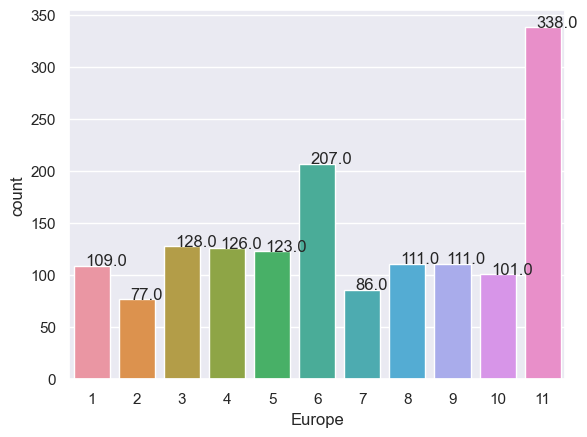

In [62]:
ax = sns.countplot(x='Europe',  data=election)
for p in ax.patches:
   ax.annotate(p.get_height(), (p.get_x()+0.25, p.get_height()+0.01))

In [63]:
election["Europe"].describe().T

count    1517.000000
mean        6.740277
std         3.299043
min         1.000000
25%         4.000000
50%         6.000000
75%        10.000000
max        11.000000
Name: Europe, dtype: float64

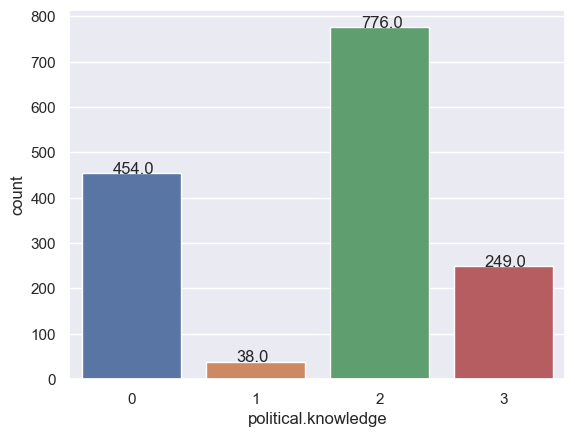

In [64]:
ax = sns.countplot(x='political.knowledge',  data=election)
for p in ax.patches:
   ax.annotate(p.get_height(), (p.get_x()+0.25, p.get_height()+0.01))

In [65]:
election["political.knowledge"].describe().T

count    1517.000000
mean        1.540541
std         1.084417
min         0.000000
25%         0.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: political.knowledge, dtype: float64

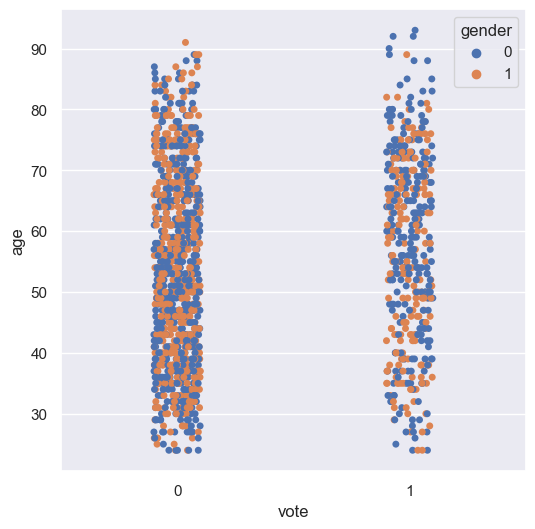

In [69]:
plt.figure(figsize=(6,6))
    sns.stripplot(x="vote", y="age", data=election, hue='gender', jitter=True) 
plt.show()

In [70]:
election.groupby(['vote', 'gender']).size()

vote  gender
0     0         551
      1         506
1     0         257
      1         203
dtype: int64

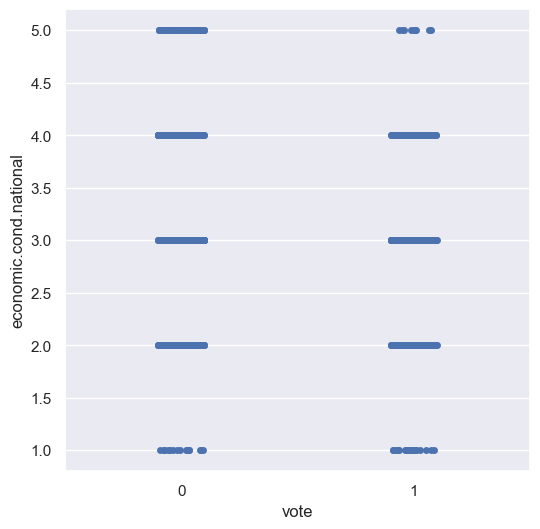

In [72]:
plt.figure(figsize=(6,6))
sns.stripplot(x="vote", y="economic.cond.national", data=election, jitter=True) 
plt.show()

In [73]:
election.groupby(['vote', 'economic.cond.national']).size()

vote  economic.cond.national
0     1                          16
      2                         116
      3                         405
      4                         447
      5                          73
1     1                          21
      2                         140
      3                         199
      4                          91
      5                           9
dtype: int64

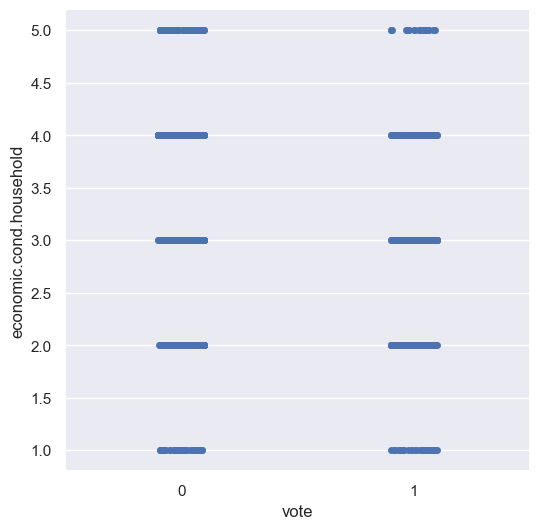

In [74]:
plt.figure(figsize=(6,6))
sns.stripplot(x="vote", y="economic.cond.household", data=election, jitter=True) 
plt.show()

In [77]:
election.groupby(['vote', 'economic.cond.household']).size()

vote  economic.cond.household
0     1                           37
      2                          154
      3                          448
      4                          349
      5                           69
1     1                           28
      2                          126
      3                          197
      4                           86
      5                           23
dtype: int64

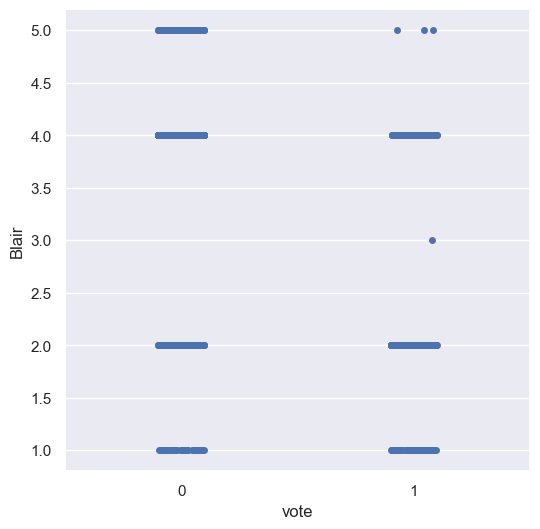

In [79]:
plt.figure(figsize=(6,6))
sns.stripplot(x="vote", y="Blair", data=election, jitter=True) 
plt.show()

In [80]:
election.groupby(['vote', 'Blair']).size()

vote  Blair
0     1         38
      2        194
      4        676
      5        149
1     1         59
      2        240
      3          1
      4        157
      5          3
dtype: int64

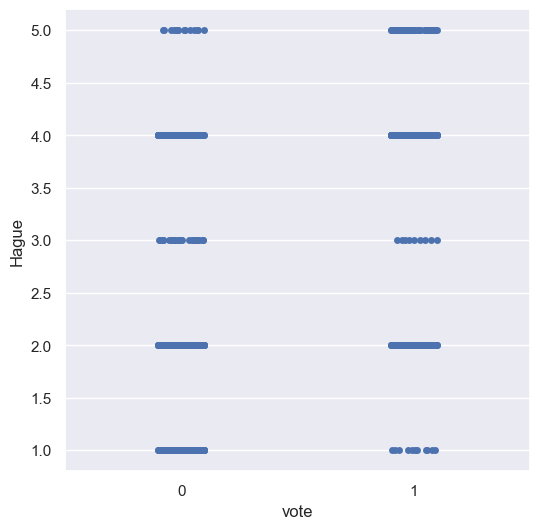

In [81]:
plt.figure(figsize=(6,6))
sns.stripplot(x="vote", y="Hague", data=election, jitter=True) 
plt.show()

In [82]:
election.groupby(['vote', 'Hague']).size()

vote  Hague
0     1        222
      2        522
      3         28
      4        271
      5         14
1     1         11
      2         95
      3          9
      4        286
      5         59
dtype: int64

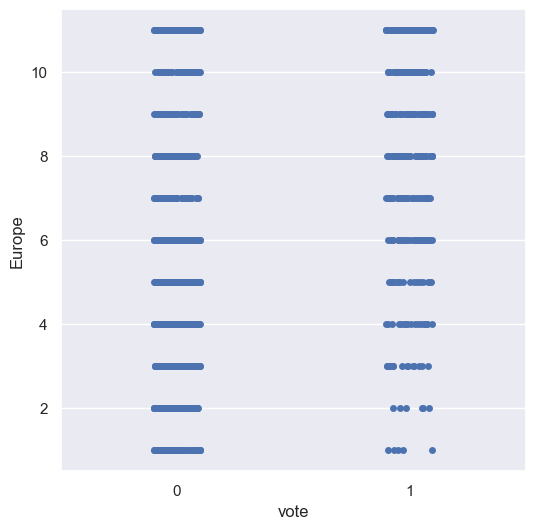

In [83]:
plt.figure(figsize=(6,6))
sns.stripplot(x="vote", y="Europe", data=election, jitter=True) 
plt.show()

In [84]:
election.groupby(['vote', 'Europe']).size()

vote  Europe
0     1         104
      2          71
      3         114
      4         108
      5         103
      6         172
      7          54
      8          63
      9          55
      10         47
      11        166
1     1           5
      2           6
      3          14
      4          18
      5          20
      6          35
      7          32
      8          48
      9          56
      10         54
      11        172
dtype: int64

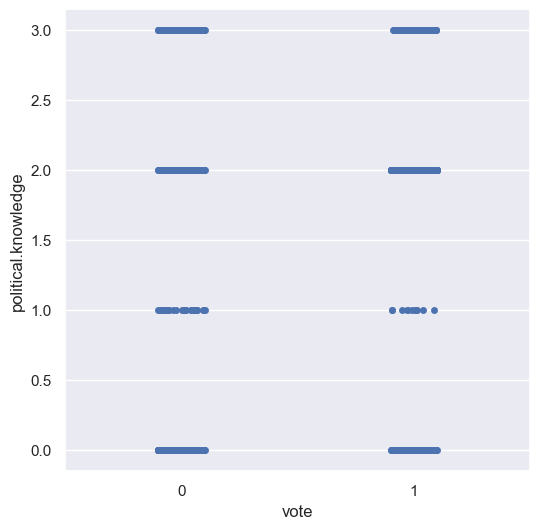

In [85]:
plt.figure(figsize=(6,6))
sns.stripplot(x="vote", y="political.knowledge", data=election, jitter=True) 
plt.show()

In [86]:
election.groupby(['vote', 'political.knowledge']).size()

vote  political.knowledge
0     0                      360
      1                       27
      2                      493
      3                      177
1     0                       94
      1                       11
      2                      283
      3                       72
dtype: int64

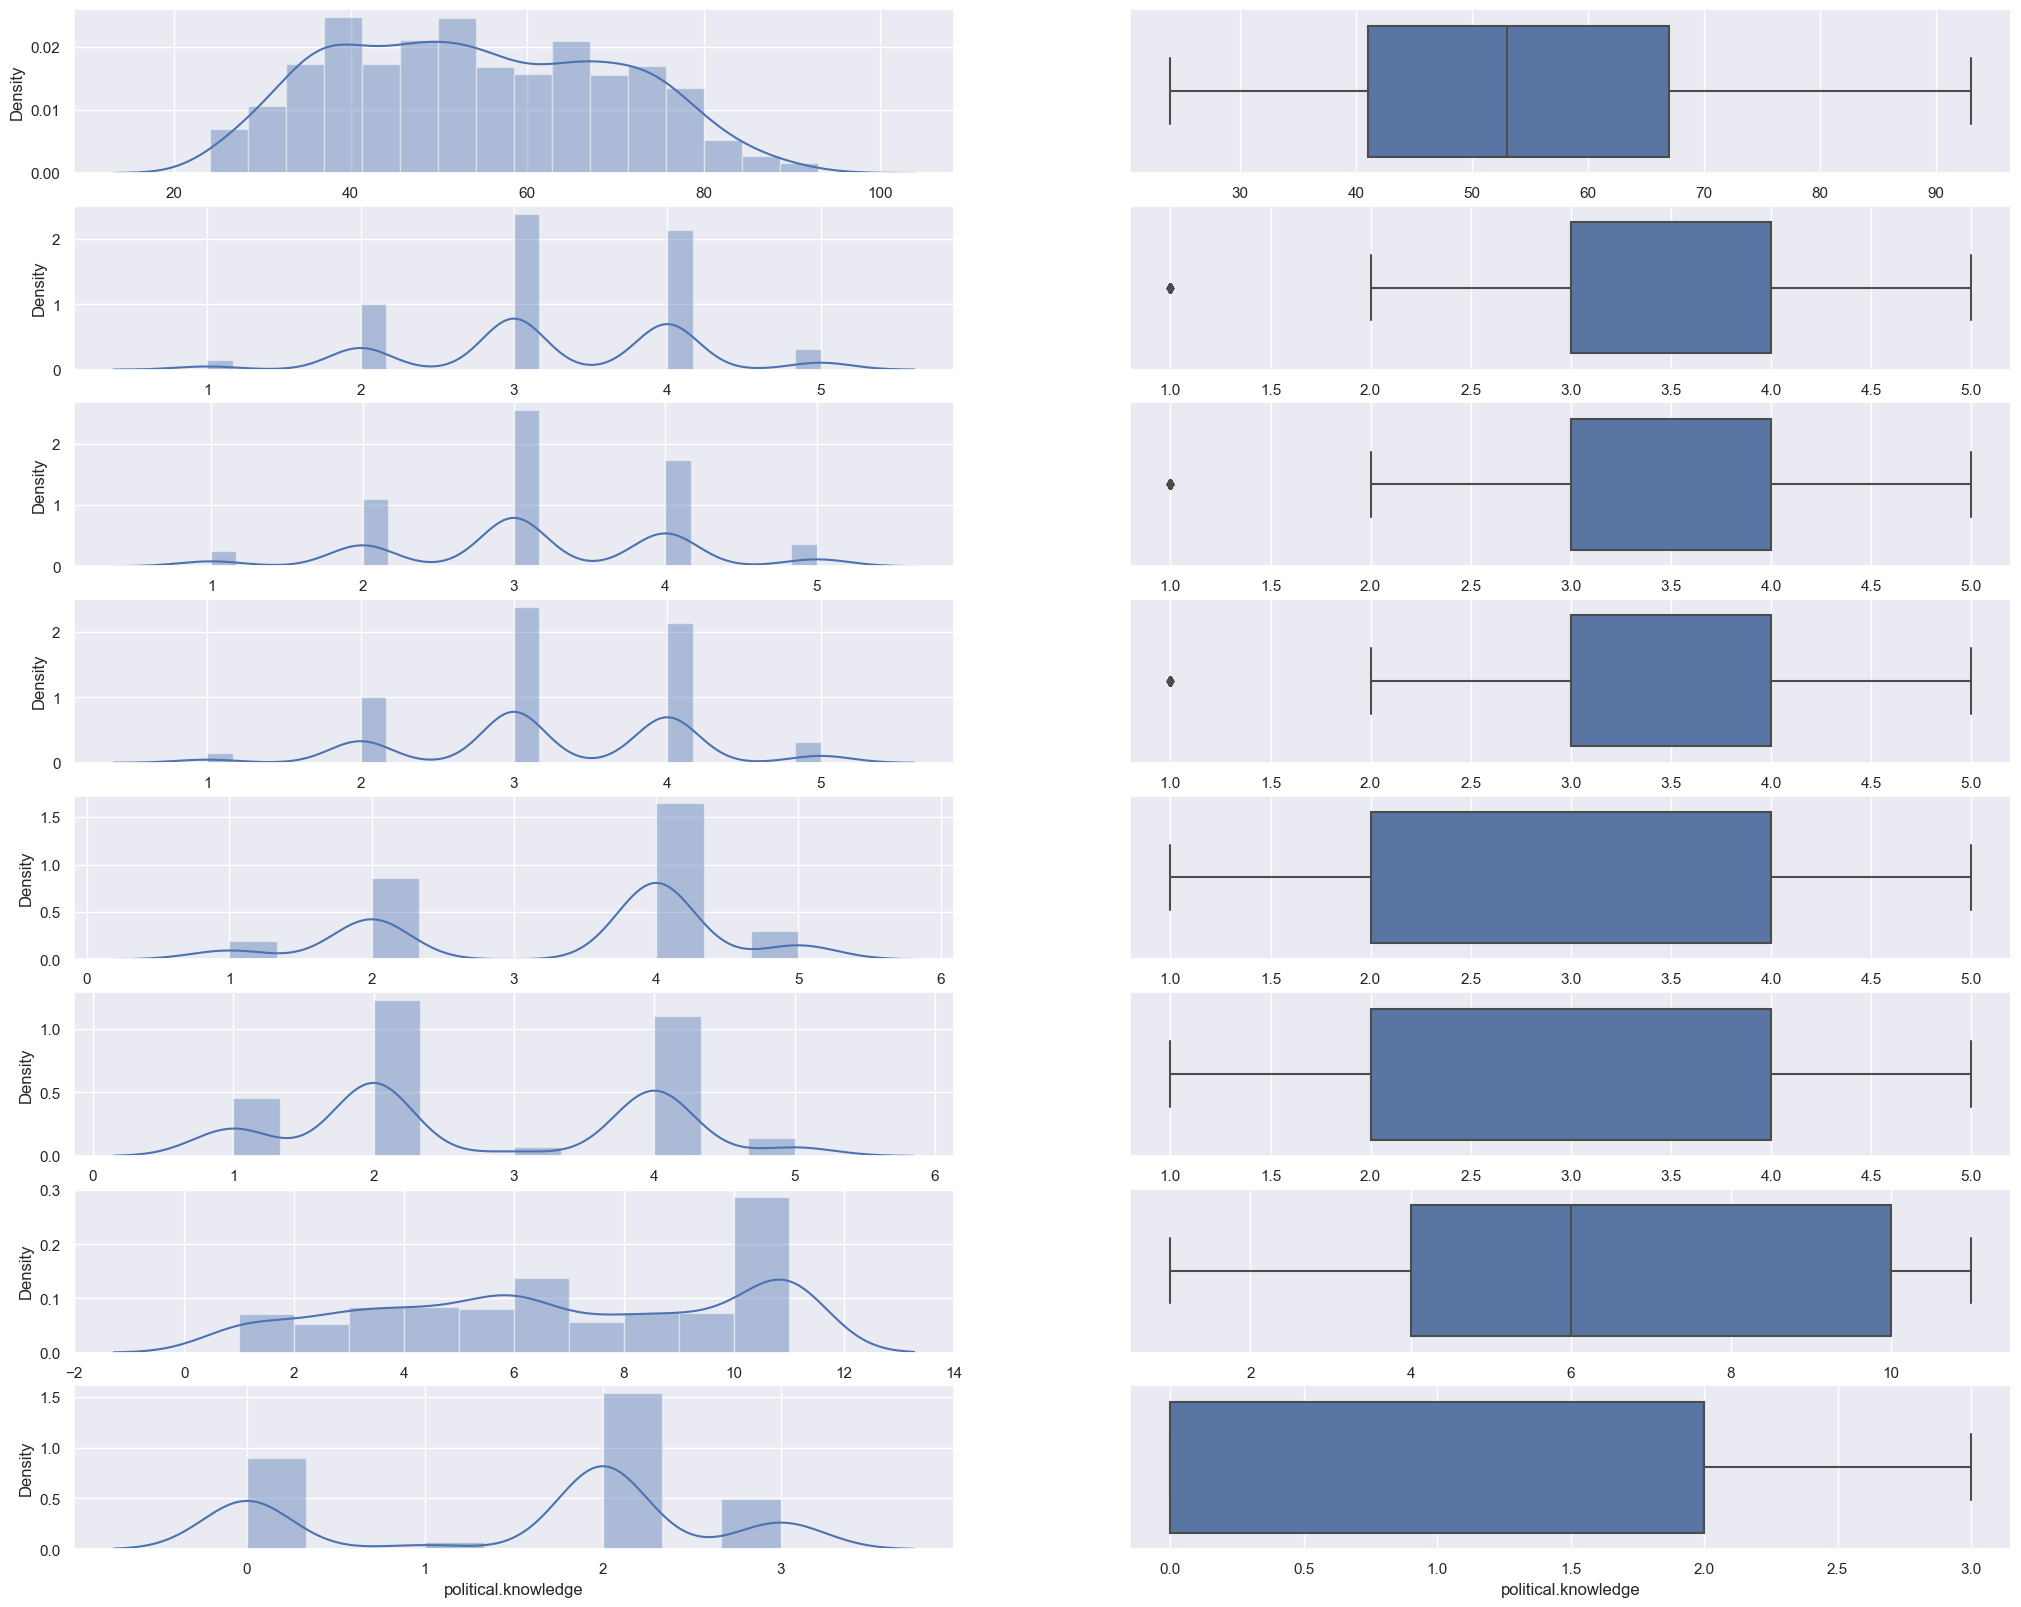

In [17]:
fig, axes = plt.subplots(nrows=8,ncols=2)
fig.set_size_inches(25,20)
sns.distplot(election['age'], kde=True, ax=axes[0][0])
sns.boxplot(x='age', data=election, ax=axes[0][1])
sns.distplot(election['economic.cond.national'] , kde=True, ax=axes[1][0])
sns.boxplot(x='economic.cond.national', data=election , ax=axes[1][1])
sns.distplot(election['economic.cond.household'], kde=True, ax=axes[2][0])
sns.boxplot(x='economic.cond.household', data=election, ax=axes[2][1])
sns.distplot(election['economic.cond.national'] , kde=True, ax=axes[3][0])
sns.boxplot(x='economic.cond.national', data=election , ax=axes[3][1])
sns.distplot(election['Blair'], kde=True, ax=axes[4][0])
sns.boxplot(x='Blair', data=election, ax=axes[4][1])
sns.distplot(election['Hague'] , kde=True, ax=axes[5][0])
sns.boxplot(x='Hague', data=election , ax=axes[5][1])
sns.distplot(election['Europe'] , kde=True, ax=axes[6][0])
sns.boxplot(x='Europe', data=election , ax=axes[6][1])
sns.distplot(election['political.knowledge'], kde=True, ax=axes[7][0])
sns.boxplot(x='political.knowledge', data=election, ax=axes[7][1])




plt.show()

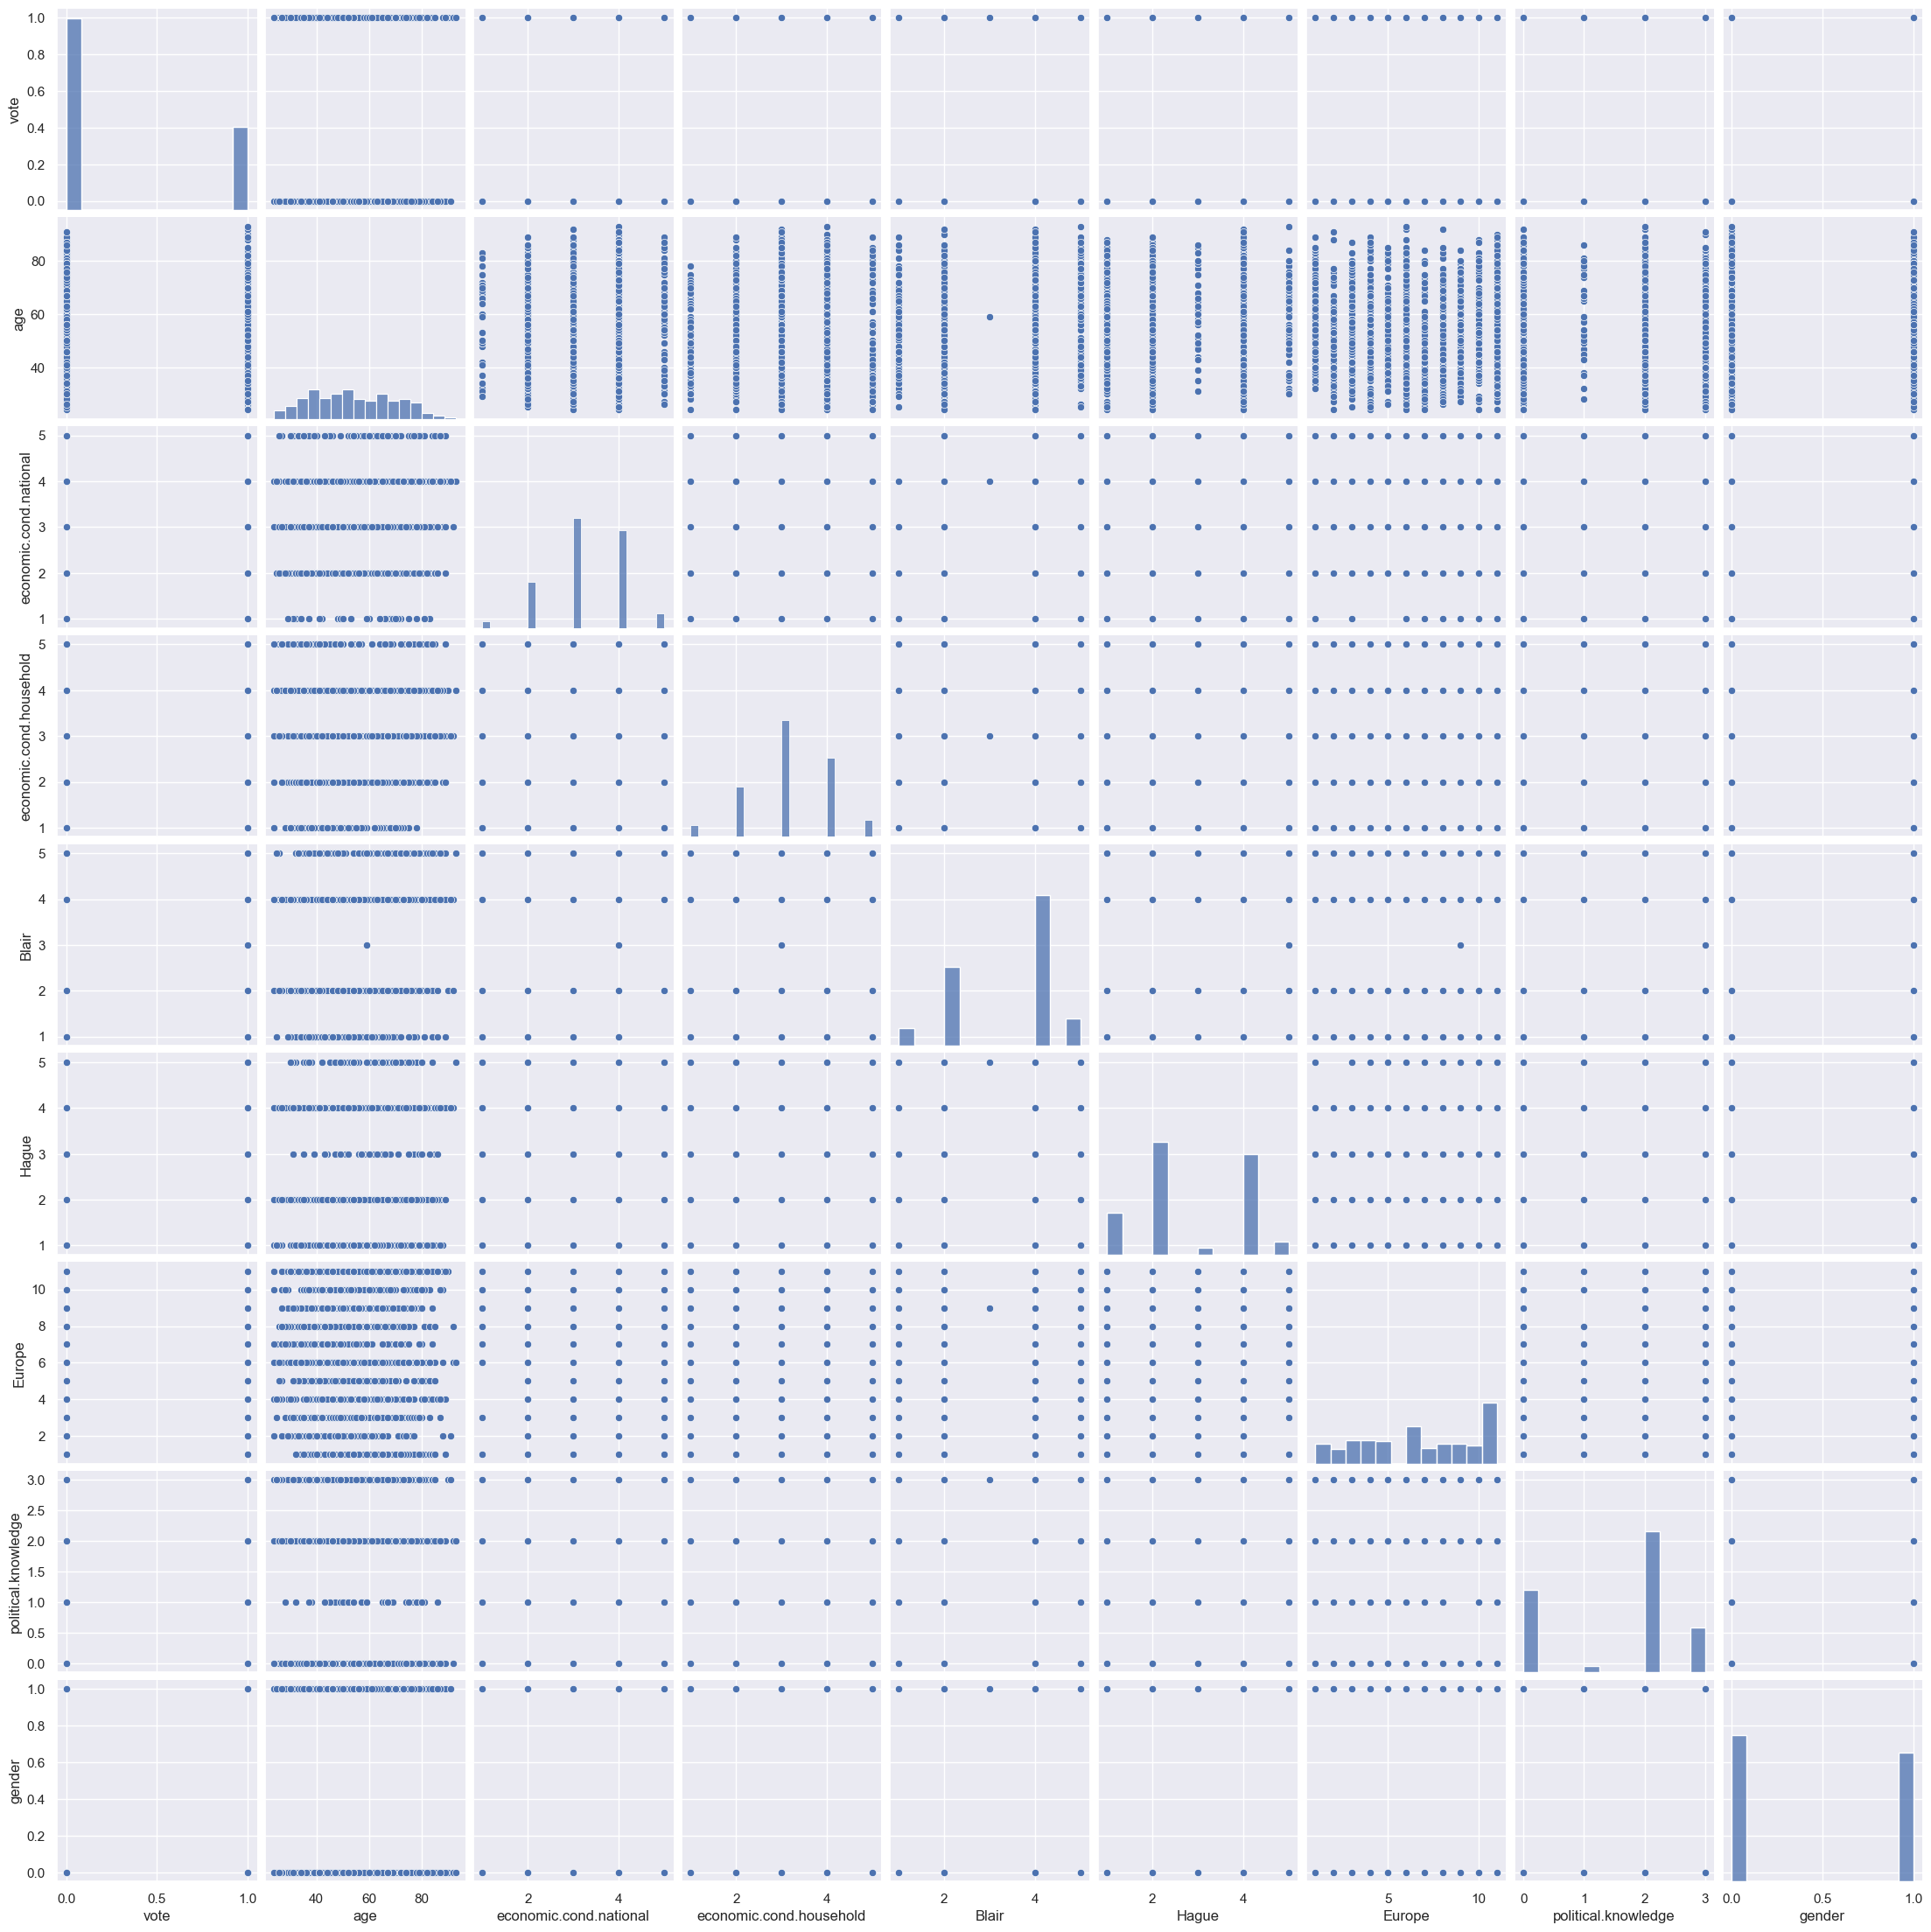

In [18]:
sns.pairplot(election)

<AxesSubplot: xlabel='Hague', ylabel='age'>

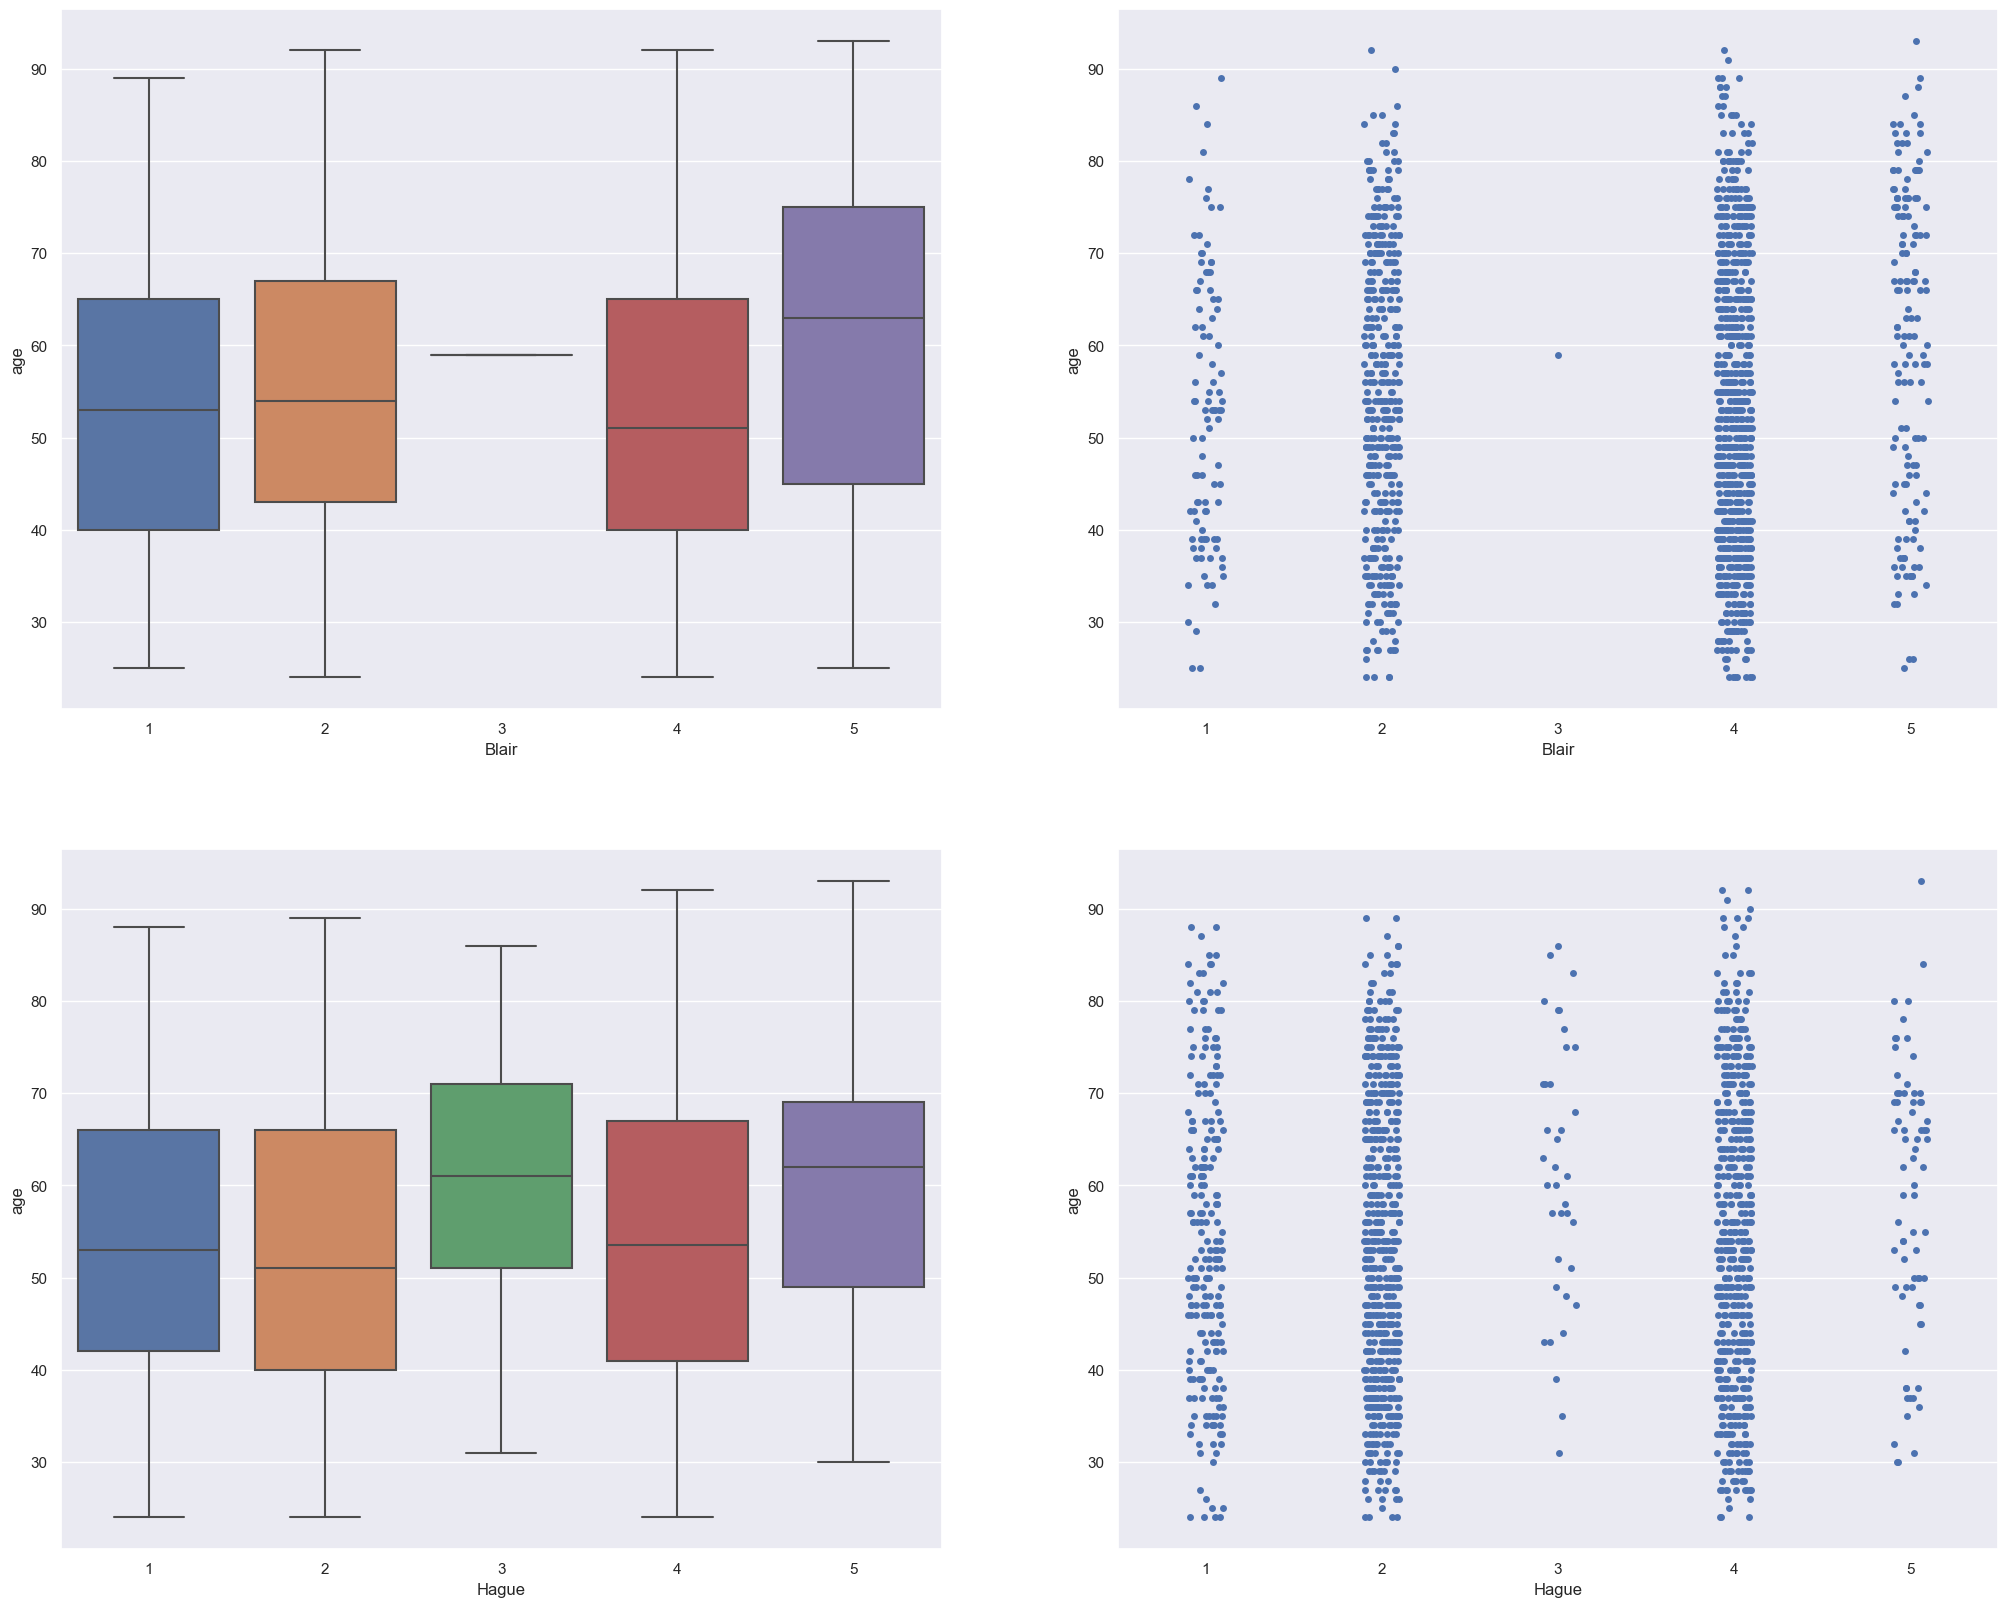

In [22]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(25,20)
sns.boxplot(x="Blair",y="age", ax = axes[0][0],data=election)
sns.stripplot(x="Blair",y="age", ax = axes[0][1],data=election)
sns.boxplot(x="Hague",y="age", ax = axes[1][0],data=election)
sns.stripplot(x="Hague",y="age", ax = axes[1][1],data=election)

<AxesSubplot: xlabel='Blair', ylabel='Count'>

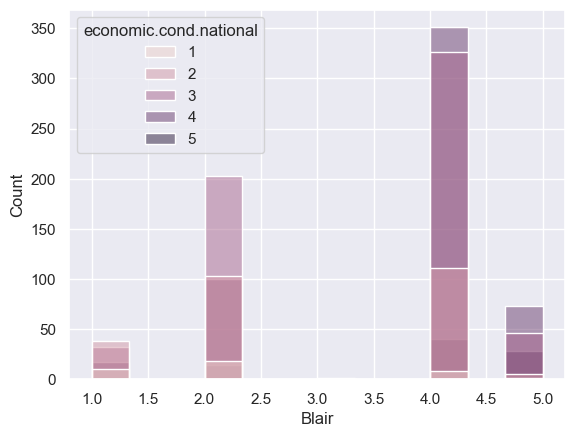

In [23]:
sns.histplot(data =election , x = "Blair", hue = "economic.cond.national")

<AxesSubplot: xlabel='Blair', ylabel='Count'>

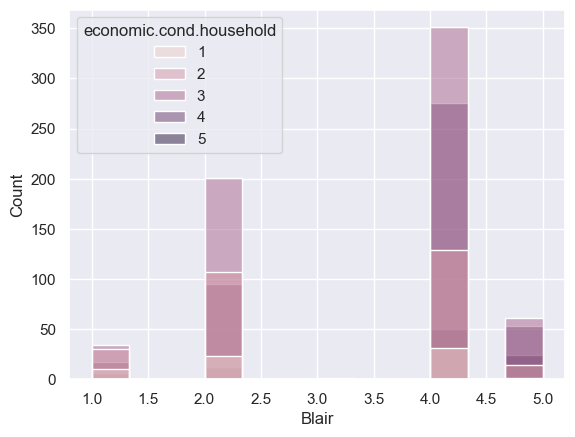

In [24]:
sns.histplot(data =election , x = "Blair", hue = "economic.cond.household")

<AxesSubplot: xlabel='Hague', ylabel='Count'>

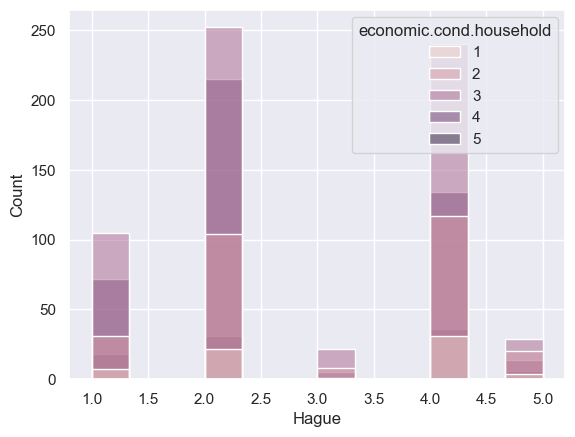

In [25]:
sns.histplot(data =election , x = "Hague", hue = "economic.cond.household")

<AxesSubplot: xlabel='Hague', ylabel='Count'>

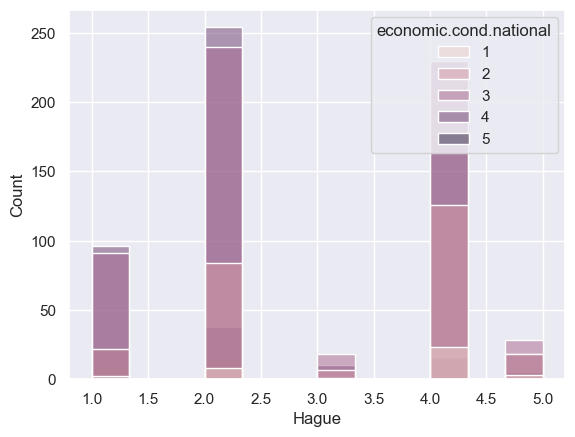

In [26]:
sns.histplot(data =election , x = "Hague", hue = "economic.cond.national")

<AxesSubplot: xlabel='Blair', ylabel='Count'>

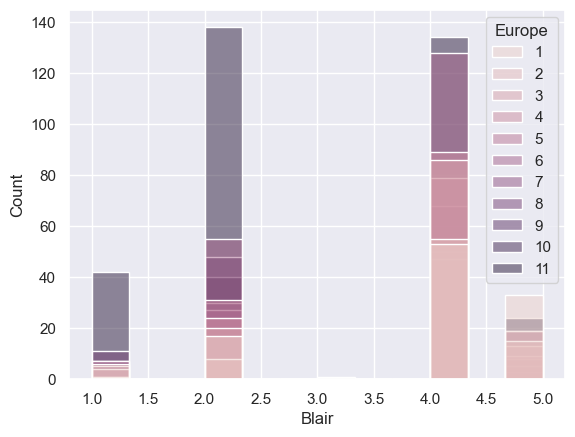

In [27]:
sns.histplot(data =election , x = "Blair", hue = "Europe")

<AxesSubplot: xlabel='Hague', ylabel='Count'>

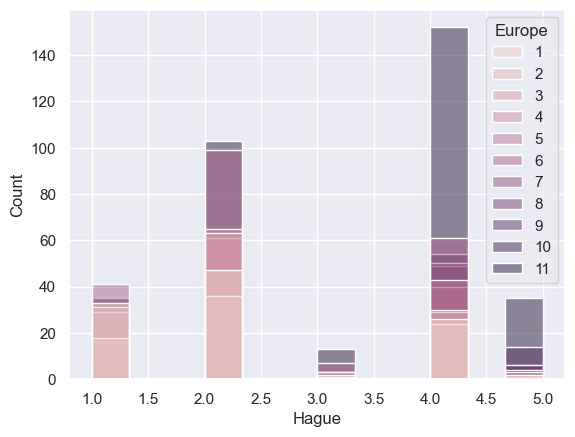

In [28]:
sns.histplot(data =election , x = "Hague", hue = "Europe")

<AxesSubplot: xlabel='Hague', ylabel='Count'>

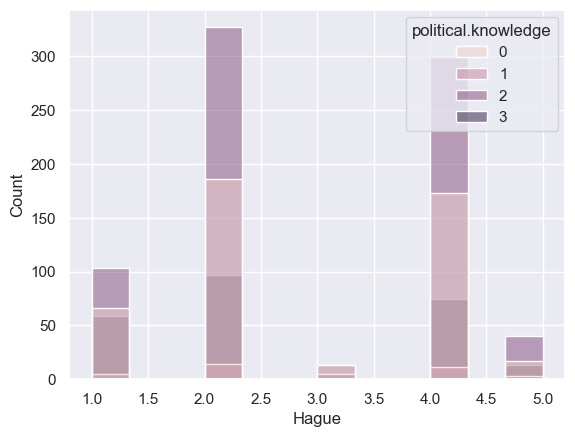

In [29]:
sns.histplot(data =election , x = "Hague", hue = "political.knowledge")

<AxesSubplot: xlabel='Hague', ylabel='Count'>

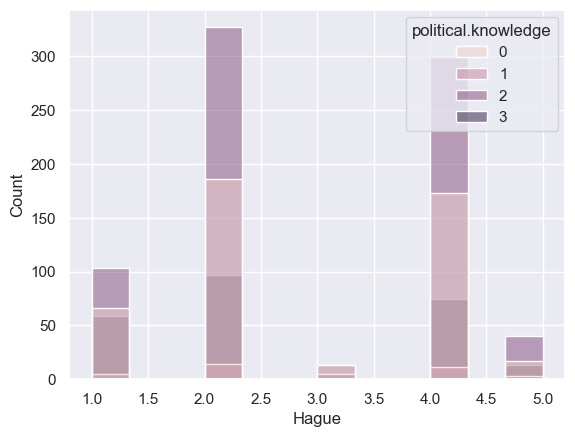

In [30]:
sns.histplot(data =election , x = "Hague", hue = "political.knowledge")

In [31]:
covMatrix = np.cov(election,bias=True)
print (covMatrix)

[[168.69135802 135.48148148 133.34567901 ... 141.51851852 234.92592593
  289.54320988]
 [135.48148148 110.         107.40740741 ... 114.11111111 191.11111111
  235.14814815]
 [133.34567901 107.40740741 105.72839506 ... 112.03703704 185.40740741
  228.60493827]
 ...
 [141.51851852 114.11111111 112.03703704 ... 119.55555556 196.88888889
  242.96296296]
 [234.92592593 191.11111111 185.40740741 ... 196.88888889 338.
  414.59259259]
 [289.54320988 235.14814815 228.60493827 ... 242.96296296 414.59259259
  509.50617284]]


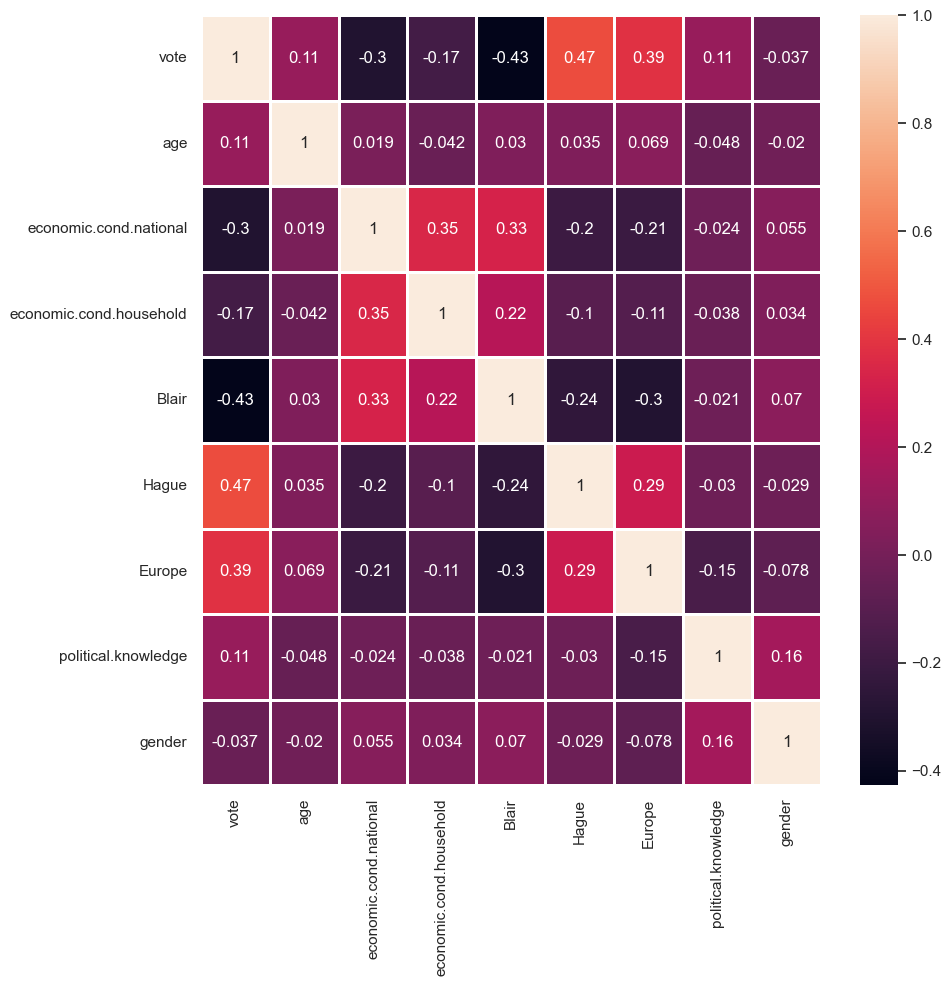

In [33]:
fig, ax = plt.subplots(figsize=(10,10)) 
dataplot = sns.heatmap(election.corr(), annot=True,linewidth = 1)

In [100]:
election.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1,0,43,3,3,4,1,2,2,0
2,0,36,4,4,4,4,5,2,1
3,0,35,4,4,5,2,3,2,1
4,0,24,4,2,2,1,4,0,0
5,0,41,2,2,1,1,6,2,1


In [101]:
election.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 1 to 1525
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   vote                     1517 non-null   int64
 1   age                      1517 non-null   int64
 2   economic.cond.national   1517 non-null   int64
 3   economic.cond.household  1517 non-null   int64
 4   Blair                    1517 non-null   int64
 5   Hague                    1517 non-null   int64
 6   Europe                   1517 non-null   int64
 7   political.knowledge      1517 non-null   int64
 8   gender                   1517 non-null   int64
dtypes: int64(9)
memory usage: 118.5 KB


In [87]:
from sklearn.preprocessing import MinMaxScaler

In [88]:
scaler = MinMaxScaler()

In [89]:
scaled = scaler.fit_transform(election)

In [98]:
scaled_df=pd.DataFrame(scaled)

In [99]:
scaled_df.head()

,0,1,2,3,4,5,6,7,8
0,0.0,0.275362,0.50,0.50,0.75,0.00,0.1,0.666667,0.0
1,0.0,0.173913,0.75,0.75,0.75,0.75,0.4,0.666667,1.0
2,0.0,0.159420,0.75,0.75,1.00,0.25,0.2,0.666667,1.0
3,0.0,0.000000,0.75,0.25,0.25,0.00,0.3,0.000000,0.0
4,0.0,0.246377,0.25,0.25,0.00,0.00,0.5,0.666667,1.0


In [102]:
x = election.drop("vote",axis = 1)
y = election.pop("vote")


In [103]:
x_train,x_test , y_train, y_test = train_test_split(x,y,test_size = .30 ,random_state = 1)

In [104]:
print(x_train)

      age  economic.cond.national  economic.cond.household  Blair  Hague  \
992    34                       2                        4      1      4   
1275   40                       4                        3      4      4   
650    61                       4                        3      4      4   
678    47                       3                        3      4      2   
539    44                       5                        3      4      2   
...   ...                     ...                      ...    ...    ...   
718    52                       3                        3      4      1   
909    43                       3                        4      2      2   
1101   74                       4                        3      5      4   
237    31                       3                        3      2      3   
1066   89                       3                        5      4      2   

      Europe  political.knowledge  gender  
992       11                    2       0  

In [105]:
print(y_train)

992     1
1275    0
650     1
678     0
539     0
       ..
718     0
909     1
1101    0
237     0
1066    0
Name: vote, Length: 1061, dtype: int64


In [106]:
print(x_test)

      age  economic.cond.national  economic.cond.household  Blair  Hague  \
505    71                       3                        3      2      2   
370    43                       3                        2      4      2   
1076   89                       5                        5      5      2   
1032   47                       2                        3      2      4   
1330   33                       5                        4      4      4   
...   ...                     ...                      ...    ...    ...   
563    37                       4                        2      4      2   
929    42                       2                        2      1      2   
277    88                       3                        3      4      1   
1129   53                       4                        3      4      2   
1152   36                       3                        3      4      1   

      Europe  political.knowledge  gender  
505        8                    2       0  

In [107]:
print(y_test)

505     0
370     0
1076    0
1032    1
1330    0
       ..
563     0
929     0
277     0
1129    0
1152    0
Name: vote, Length: 456, dtype: int64


In [112]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape )

(1061, 8) (1061,) (456, 8) (456,)


In [113]:
from sklearn.linear_model import LogisticRegression

In [114]:
lr = LogisticRegression(tol=0.0001,max_iter=2000,random_state= 0)

In [115]:
lr.fit(x_train,y_train)

LogisticRegression(max_iter=2000, random_state=0)

In [116]:
y_train_predict=lr.predict(x_train)

In [117]:
from sklearn.metrics import classification_report,confusion_matrix

In [118]:
print(classification_report(y_train ,y_train_predict))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88       754
           1       0.74      0.64      0.69       307

    accuracy                           0.83      1061
   macro avg       0.80      0.77      0.79      1061
weighted avg       0.83      0.83      0.83      1061



AxesSubplot(0.125,0.11;0.62x0.77)


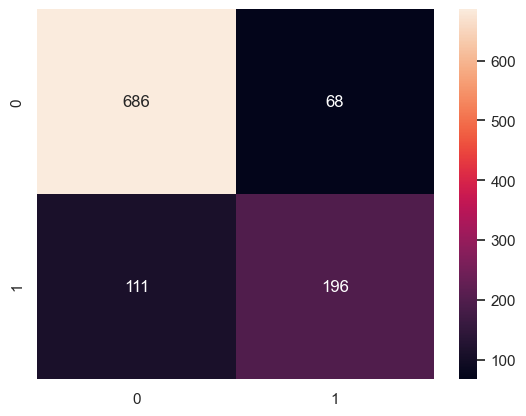

In [120]:
print(sns.heatmap(confusion_matrix(y_train,y_train_predict),annot=True , fmt="2g"))

AUC: 0.890


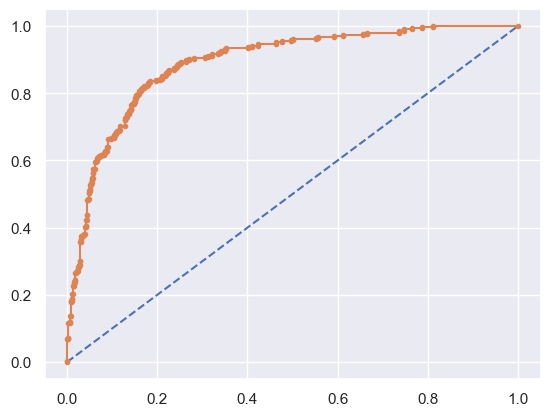

In [121]:
# AUC and ROC for the training data

# predict probabilities
probs = lr.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [122]:
def calAccuracy(TP, TN, FP, FN):
    return(TP + TN) / (TP + TN + FP + FN)

In [125]:
print("Accuracy on Training", calAccuracy(686, 196, 68, 111))

Accuracy on Train 0.8312912346842601


In [124]:
print(classification_report(y_test,lr.predict(x_test)))

              precision    recall  f1-score   support

           0       0.87      0.88      0.88       303
           1       0.76      0.74      0.75       153

    accuracy                           0.84       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.84      0.83       456



In [126]:
print(confusion_matrix(y_test,lr.predict(x_test)))

[[268  35]
 [ 40 113]]


AxesSubplot(0.125,0.11;0.62x0.77)


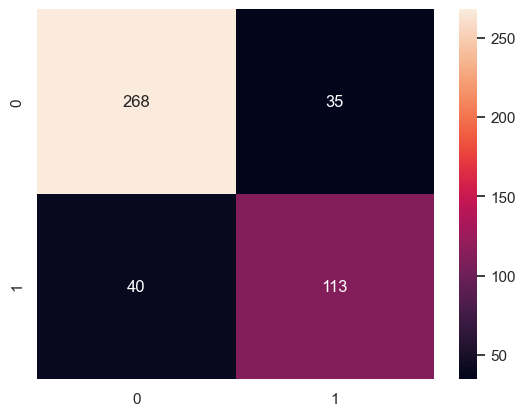

In [214]:
print(sns.heatmap(confusion_matrix(y_test,lr.predict(x_test)),annot=True , fmt="2g" ))

In [127]:
print("Accuracy on Testing", calAccuracy(268, 113, 35, 40))

Accuracy on Testing 0.8355263157894737


In [128]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_train_predict, y_train))

0.16870876531573986


In [129]:
print(mean_squared_error(lr.predict(x_test), y_test))

0.16447368421052633


AUC: 0.883


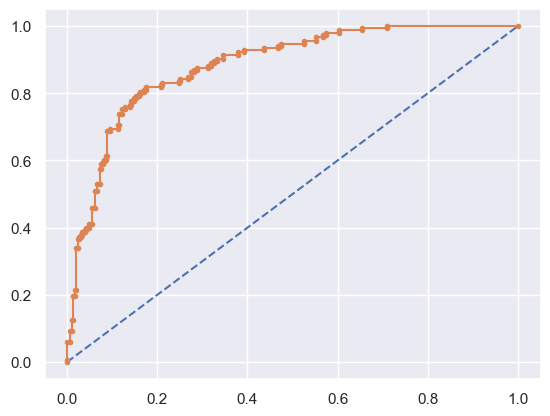

In [130]:
# AUC and ROC for the test data

# predict probabilities
probs = lr.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [131]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [132]:

lda = LinearDiscriminantAnalysis()

In [133]:
lda = lda.fit(x_train,y_train)

AxesSubplot(0.125,0.11;0.62x0.77)


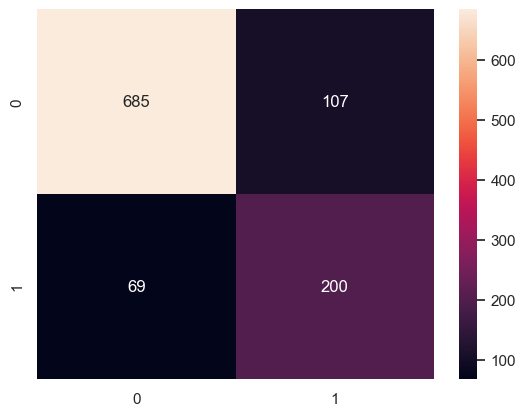

In [135]:
print(sns.heatmap(confusion_matrix(lda.predict(x_train),y_train), annot=True , fmt="2g"))

In [137]:
print(confusion_matrix(lda.predict(x_train),y_train))
print(classification_report(lda.predict(x_train),y_train))

[[685 107]
 [ 69 200]]
              precision    recall  f1-score   support

           0       0.91      0.86      0.89       792
           1       0.65      0.74      0.69       269

    accuracy                           0.83      1061
   macro avg       0.78      0.80      0.79      1061
weighted avg       0.84      0.83      0.84      1061



AUC: 0.889


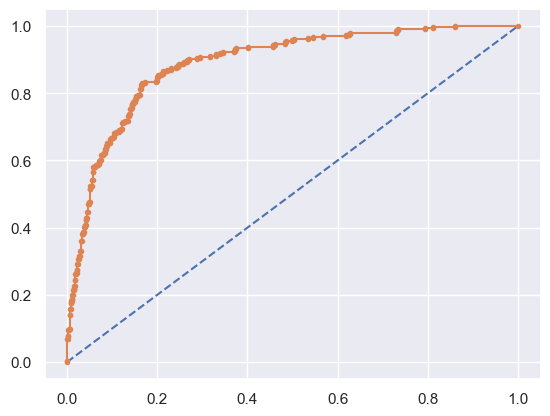

In [141]:
# AUC and ROC for the training data

# predict probabilities
probs = lda.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot

In [138]:
print(confusion_matrix(lda.predict(x_test),y_test))
print(classification_report(lda.predict(x_test),y_test))

[[269  42]
 [ 34 111]]
              precision    recall  f1-score   support

           0       0.89      0.86      0.88       311
           1       0.73      0.77      0.74       145

    accuracy                           0.83       456
   macro avg       0.81      0.82      0.81       456
weighted avg       0.84      0.83      0.83       456



AxesSubplot(0.125,0.11;0.62x0.77)


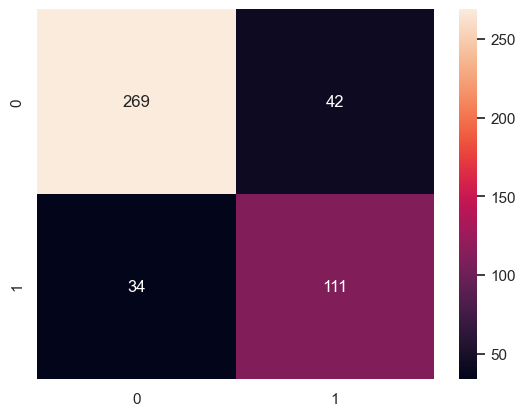

In [215]:
print(sns.heatmap(confusion_matrix(lda.predict(x_test),y_test), annot=True , fmt="2g"))

AUC: 0.888


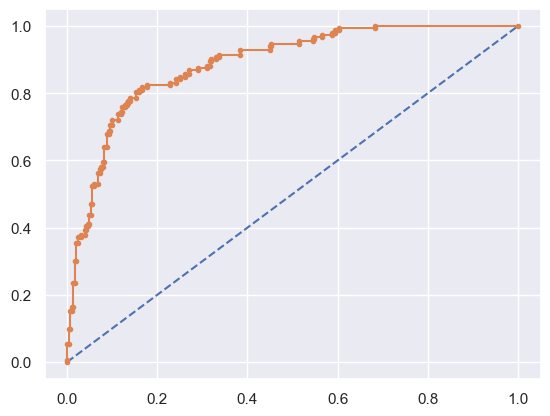

In [142]:
# AUC and ROC for the test data

# predict probabilities
probs = lda.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [139]:
print("Accuracy on Training", calAccuracy(685, 200, 107, 69))

Accuracy on Training 0.8341187558906692


In [140]:
print("Accuracy on Testing", calAccuracy(269, 111, 42, 34))

Accuracy on Testing 0.8333333333333334


In [143]:
from sklearn.neighbors import KNeighborsClassifier

In [144]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [145]:
knn = knn.fit(x_train,y_train)

In [146]:
pred_label= knn.predict(x_test)
knn.score(x_test,y_test)

0.8245614035087719

In [147]:
print(confusion_matrix(knn.predict(x_train),y_train))

[[699  98]
 [ 55 209]]


AxesSubplot(0.125,0.11;0.62x0.77)


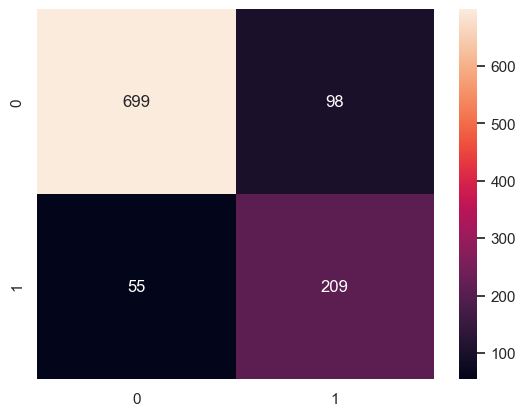

In [216]:
print(sns.heatmap(confusion_matrix(knn.predict(x_train),y_train), annot=True , fmt="2g"))

In [150]:
print("Accuracy on Training", calAccuracy(699, 209, 98, 55))

Accuracy on Training 0.8557964184731386


In [149]:
print(classification_report(knn.predict(x_train),y_train))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90       797
           1       0.68      0.79      0.73       264

    accuracy                           0.86      1061
   macro avg       0.80      0.83      0.82      1061
weighted avg       0.87      0.86      0.86      1061



AUC: 0.924


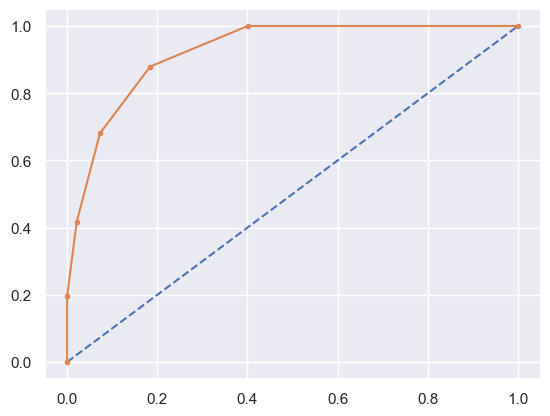

In [153]:
# AUC and ROC for the training data

# predict probabilities
probs = knn.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot

In [151]:
print(confusion_matrix(knn.predict(x_test),y_test))

[[275  52]
 [ 28 101]]


AxesSubplot(0.125,0.11;0.62x0.77)


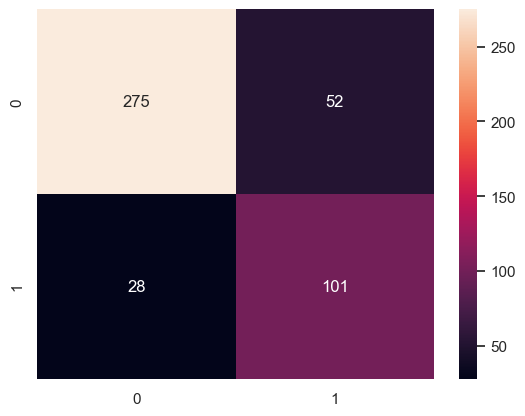

In [217]:
print(sns.heatmap(confusion_matrix(knn.predict(x_test),y_test), annot=True , fmt="2g"))

In [152]:
print("Accuracy on Testing", calAccuracy(275, 101, 52, 28))

Accuracy on Testing 0.8245614035087719


In [148]:
print(classification_report(knn.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.91      0.84      0.87       327
           1       0.66      0.78      0.72       129

    accuracy                           0.82       456
   macro avg       0.78      0.81      0.79       456
weighted avg       0.84      0.82      0.83       456



AUC: 0.861


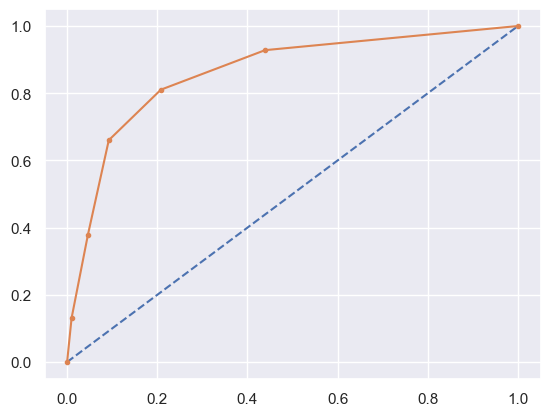

In [154]:
# predict probabilities
probs = knn.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [155]:
from sklearn.naive_bayes import GaussianNB

In [156]:
nb=GaussianNB()

In [157]:
nb= nb.fit(x_train, y_train)

In [158]:
print(confusion_matrix(nb.predict(x_train),y_train))
print(classification_report(nb.predict(x_train),y_train))

[[675  96]
 [ 79 211]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       771
           1       0.69      0.73      0.71       290

    accuracy                           0.84      1061
   macro avg       0.79      0.80      0.80      1061
weighted avg       0.84      0.84      0.84      1061



AxesSubplot(0.125,0.11;0.62x0.77)


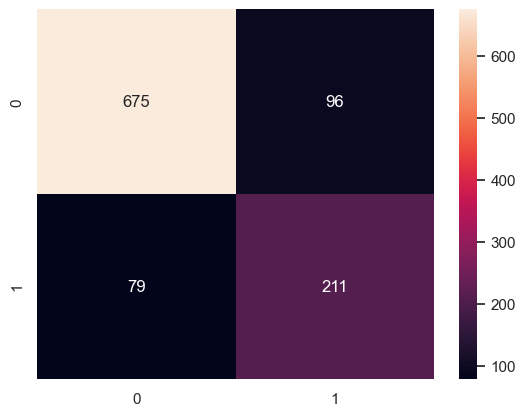

In [218]:
print(sns.heatmap(confusion_matrix(nb.predict(x_train),y_train), annot=True , fmt="2g"))

In [159]:
print("Accuracy on Training", calAccuracy(675, 211, 96, 79))

Accuracy on Training 0.8350612629594723


AUC: 0.888


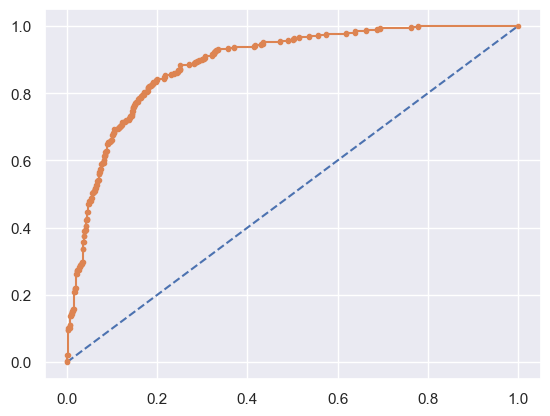

In [160]:
# AUC and ROC for the training data

# predict probabilities
probs = nb.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

In [161]:
print(confusion_matrix(nb.predict(x_test),y_test))
print(classification_report(nb.predict(x_test),y_test))

[[263  41]
 [ 40 112]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       304
           1       0.73      0.74      0.73       152

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



AxesSubplot(0.125,0.11;0.62x0.77)


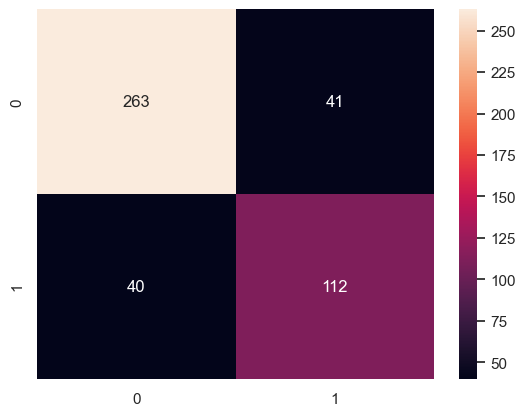

In [219]:
print(sns.heatmap(confusion_matrix(nb.predict(x_test),y_test), annot=True , fmt="2g"))

In [162]:
print("Accuracy on Testing", calAccuracy(263, 112, 41, 40))

Accuracy on Testing 0.8223684210526315


AUC: 0.876


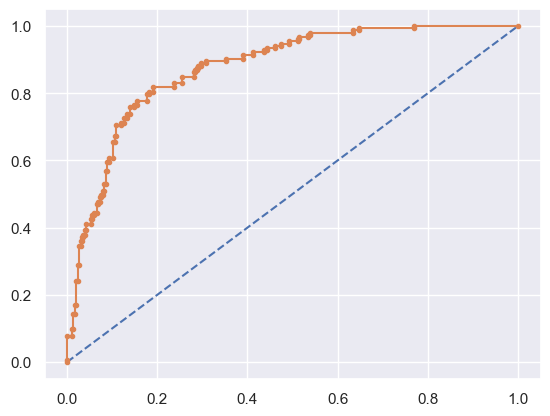

In [163]:
# predict probabilities
probs = nb.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [192]:
param_grid = {
    'min_samples_split' : [30,50,70,100],
    'min_samples_leaf':[15,25,35,50],
    'max_depth':[5,10,15,20],
    'random_state' : [0]
}

In [185]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [193]:
RF_model=RandomForestClassifier()

In [194]:
grid_search=GridSearchCV(estimator=RF_model,param_grid=param_grid,cv=10)

In [195]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [15, 25, 35, 50],
                         'min_samples_split': [30, 50, 70, 100],
                         'random_state': [0]})

In [196]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=10, min_samples_leaf=15, min_samples_split=30,
                       random_state=0)

In [197]:
RF_model=grid_search.best_estimator_

In [198]:
RF_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=15, min_samples_split=30,
                       random_state=0)

In [221]:
## Performance Matrix on train data set
y_train_predict = RF_model.predict(x_train)
model_score =RF_model.score(x_train, y_train)
print(model_score)
print( confusion_matrix(y_train, y_train_predict))
print( classification_report(y_train, y_train_predict))

0.8576814326107446
[[708  46]
 [105 202]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       754
           1       0.81      0.66      0.73       307

    accuracy                           0.86      1061
   macro avg       0.84      0.80      0.82      1061
weighted avg       0.85      0.86      0.85      1061



AxesSubplot(0.125,0.11;0.62x0.77)


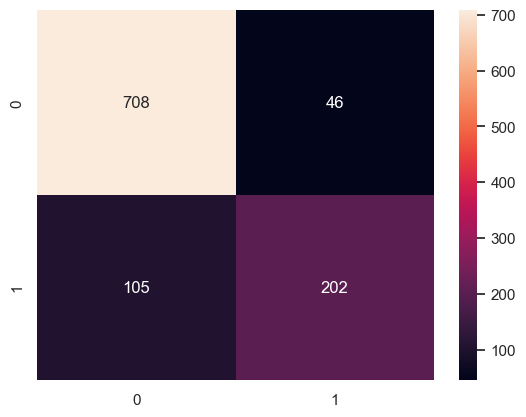

In [222]:
print(sns.heatmap(confusion_matrix(y_train, y_train_predict), annot=True , fmt="2g"))

AUC: 0.918


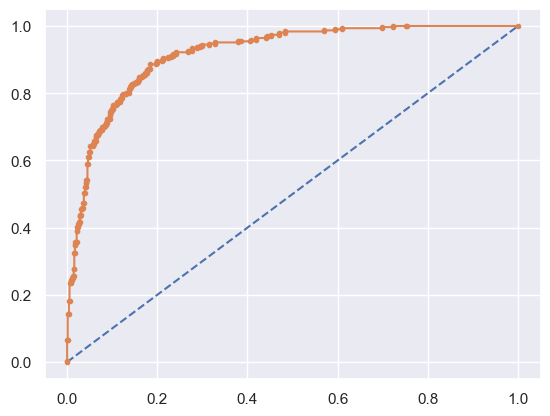

In [200]:

# predict probabilities
probs = RF_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

In [223]:
# Performance Matrix on test data set
y_test_predict = RF_model.predict(x_test)
model_score = RF_model.score(x_test, y_test)
print(model_score)
print( confusion_matrix(y_test, y_test_predict))
print( classification_report(y_test, y_test_predict))

0.8179824561403509
[[280  23]
 [ 60  93]]
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       303
           1       0.80      0.61      0.69       153

    accuracy                           0.82       456
   macro avg       0.81      0.77      0.78       456
weighted avg       0.82      0.82      0.81       456



AxesSubplot(0.125,0.11;0.62x0.77)


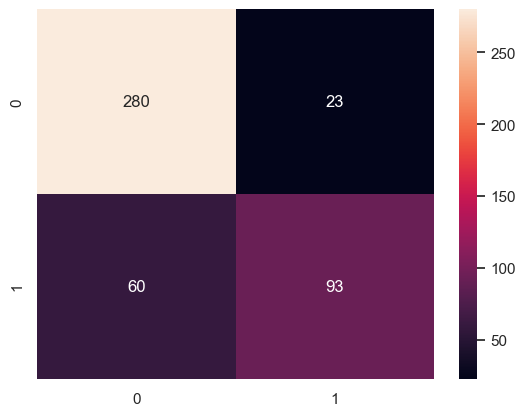

In [224]:
print(sns.heatmap(confusion_matrix(y_test, y_test_predict), annot=True , fmt="2g"))

AUC: 0.891


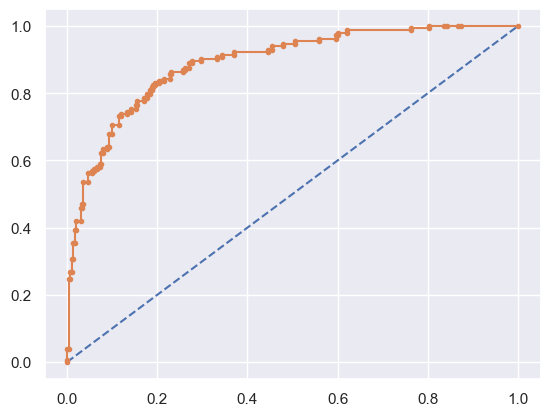

In [202]:
# predict probabilities
probs = RF_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [204]:
from sklearn.tree import DecisionTreeClassifier

In [203]:
param_grid = {
    'min_samples_split' : [30,50,70,100],
    'min_samples_leaf':[15,25,35,50],
    'max_depth':[5,10,15,20],
    'random_state' : [0]
}

In [206]:
DT_model= DecisionTreeClassifier()

In [207]:
grid_search=GridSearchCV(estimator=DT_model,param_grid=param_grid,cv=10)

In [208]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [15, 25, 35, 50],
                         'min_samples_split': [30, 50, 70, 100],
                         'random_state': [0]})

In [209]:
DT_model=grid_search.best_estimator_

In [210]:
DT_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=15, min_samples_split=50,
                       random_state=0)

In [225]:
## Performance Matrix on train data set
y_train_predict = DT_model.predict(x_train)
model_score = DT_model.score(x_train, y_train)
print(model_score)
print( confusion_matrix(y_train, y_train_predict))
print( classification_report(y_train, y_train_predict))

0.8397737983034873
[[657  97]
 [ 73 234]]
              precision    recall  f1-score   support

           0       0.90      0.87      0.89       754
           1       0.71      0.76      0.73       307

    accuracy                           0.84      1061
   macro avg       0.80      0.82      0.81      1061
weighted avg       0.84      0.84      0.84      1061



AxesSubplot(0.125,0.11;0.62x0.77)


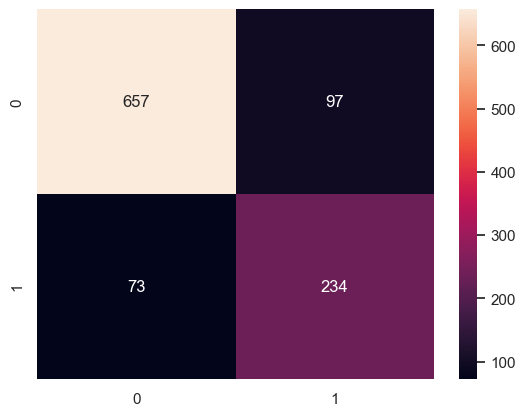

In [226]:
print(sns.heatmap(confusion_matrix(y_train, y_train_predict), annot=True , fmt="2g"))

AUC: 0.907


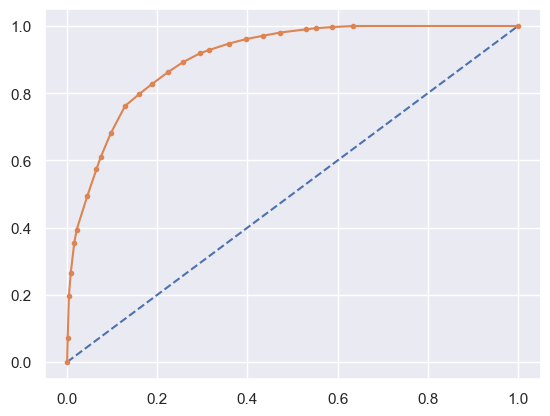

In [212]:
# AUC and ROC for the training data

# predict probabilities
probs = DT_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

In [227]:
## Performance Matrix on test data set
y_test_predict = DT_model.predict(x_test)
model_score = DT_model.score(x_test, y_test)
print(model_score)
print( confusion_matrix(y_test, y_test_predict))
print( classification_report(y_test, y_test_predict))

0.7960526315789473
[[250  53]
 [ 40 113]]
              precision    recall  f1-score   support

           0       0.86      0.83      0.84       303
           1       0.68      0.74      0.71       153

    accuracy                           0.80       456
   macro avg       0.77      0.78      0.78       456
weighted avg       0.80      0.80      0.80       456



AxesSubplot(0.125,0.11;0.62x0.77)


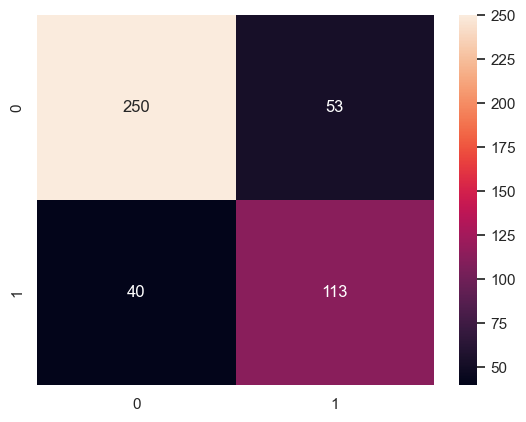

In [228]:
print(sns.heatmap(confusion_matrix(y_test, y_test_predict), annot=True , fmt="2g"))

AUC: 0.856


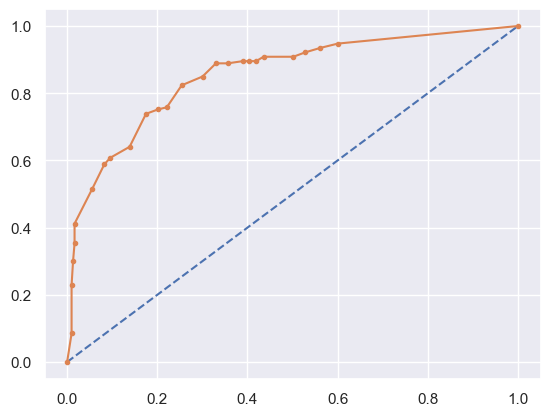

In [229]:
# predict probabilities
probs = DT_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [230]:
# y_train_predict=Bagging_model.predict(x_train)
# Bagging_model_score=Bagging_model.score(x_train,y_train)
# print(Bagging_model_score)

# print(metrics.confusion_matrix(y_train,y_train_predict))
# print(metrics.classification_report(y_train,y_train_predict))

In [233]:
# probs = Bagging_model.predict_proba(x_train)

# probs = probs[:, 1]

# auc = roc_auc_score(y_train, probs)
# print('AUC: %.3f' % auc)

# train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
# plt.plot([0, 1], [0, 1], linestyle='--')

# plt.plot(train_fpr, train_tpr)

In [231]:
# y_test_predict=Bagging_model.predict(x_test)
# Bagging_model_score=Bagging_model.score(x_test,y_test)
# print(Bagging_model_score)

# print(metrics.confusion_matrix(y_test,y_test_predict))
# print(metrics.classification_report(y_test,y_test_predict))

In [232]:
# probs_test = Bagging_model.predict_proba(x_test)

# probs_test = probs_test[:, 1]

# auc = roc_auc_score(y_test, probs_test)
# print('AUC: %.3f' % auc)

# test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_test)
# plt.plot([0, 1], [0, 1], linestyle='--')

# plt.plot(test_fpr, test_tpr);

In [164]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

In [165]:
param_grid = {
    'n_estimators' : [100,500,1000],
    'learning_rate' : [0.1,0.01,0.001],
    'algorithm' : ['SAMME', 'SAMME.R']
}

In [166]:
ADB_model=AdaBoostClassifier()

In [167]:
grid_search=GridSearchCV(estimator=ADB_model,param_grid=param_grid)

In [168]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.1, 0.01, 0.001],
                         'n_estimators': [100, 500, 1000]})

In [169]:
ADB_model=grid_search.best_estimator_

In [170]:
ADB_model.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.01, n_estimators=1000)

In [234]:
## Performance Matrix on train data set
y_train_predict = ADB_model.predict(x_train)
model_score = ADB_model.score(x_train, y_train)
print(model_score)
print(confusion_matrix(y_train, y_train_predict))
print(classification_report(y_train, y_train_predict))

0.8369462770970783
[[702  52]
 [121 186]]
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       754
           1       0.78      0.61      0.68       307

    accuracy                           0.84      1061
   macro avg       0.82      0.77      0.79      1061
weighted avg       0.83      0.84      0.83      1061



AxesSubplot(0.125,0.11;0.62x0.77)


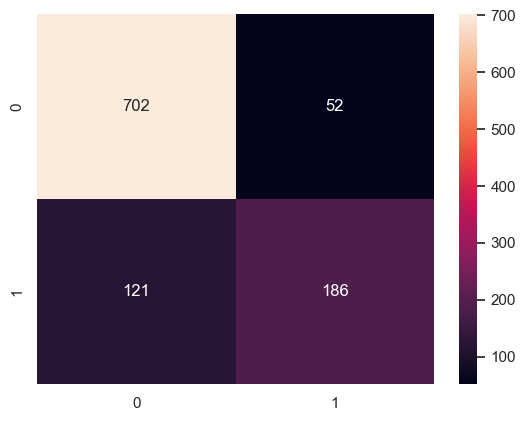

In [235]:
print(sns.heatmap(confusion_matrix(y_train, y_train_predict), annot=True , fmt="2g"))

In [172]:
print("Accuracy on Training", calAccuracy(702, 186, 52, 121))

Accuracy on Training 0.8369462770970783


AUC: 0.902


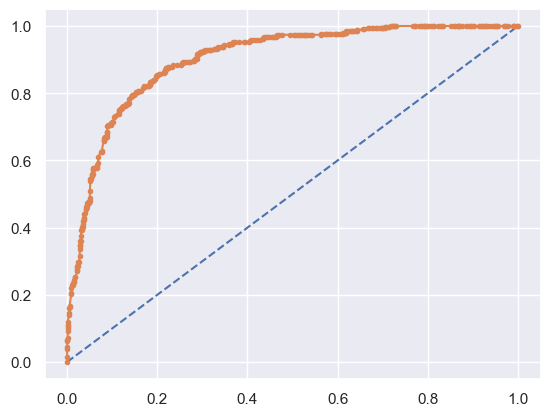

In [173]:
# AUC and ROC for the training data

# predict probabilities
probs = ADB_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

In [236]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(x_test)
model_score = ADB_model.score(x_test, y_test)
print(model_score)
print( confusion_matrix(y_test, y_test_predict))
print( classification_report(y_test, y_test_predict))

0.8092105263157895
[[271  32]
 [ 55  98]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       303
           1       0.75      0.64      0.69       153

    accuracy                           0.81       456
   macro avg       0.79      0.77      0.78       456
weighted avg       0.81      0.81      0.80       456



AxesSubplot(0.125,0.11;0.62x0.77)


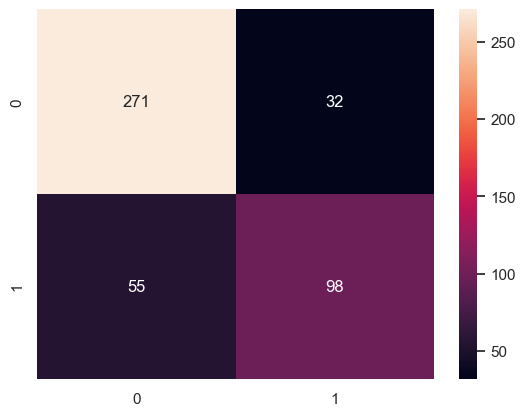

In [237]:
print(sns.heatmap(confusion_matrix(y_test, y_test_predict), annot=True , fmt="2g"))

AUC: 0.884


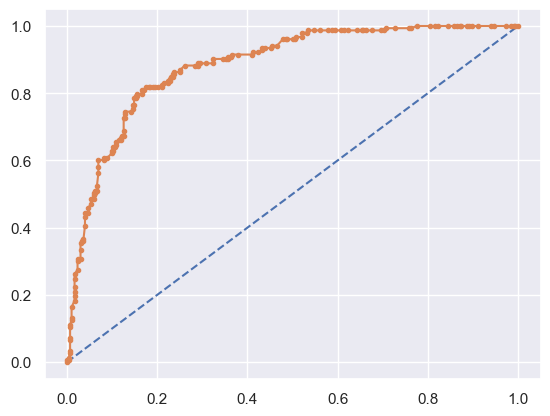

In [175]:
# predict probabilities
probs = ADB_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [177]:
from sklearn.ensemble import GradientBoostingClassifier
gbc_model=GradientBoostingClassifier(random_state=1)
gbc_model.fit(x_train, y_train)

GradientBoostingClassifier(random_state=1)

In [238]:
y_train_predict = gbc_model.predict(x_train)
gbc_model_score = gbc_model.score(x_train, y_train)
print(gbc_model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8925541941564562
[[708  46]
 [ 68 239]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       754
           1       0.84      0.78      0.81       307

    accuracy                           0.89      1061
   macro avg       0.88      0.86      0.87      1061
weighted avg       0.89      0.89      0.89      1061



AxesSubplot(0.125,0.11;0.62x0.77)


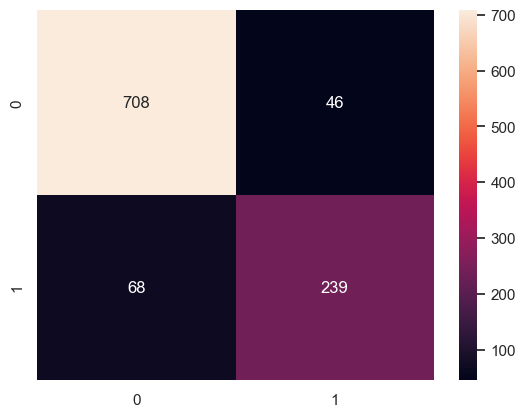

In [239]:
print(sns.heatmap(confusion_matrix(y_train, y_train_predict), annot=True , fmt="2g"))

AUC: 0.951


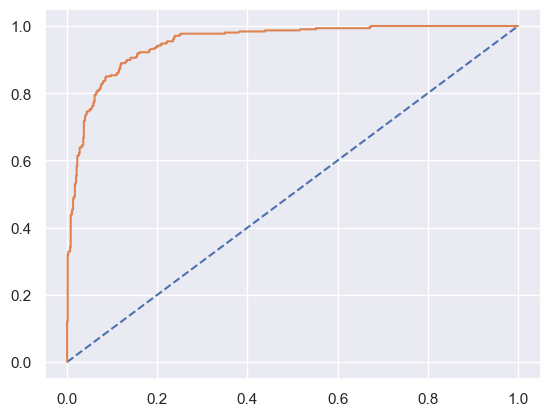

In [181]:
probs = gbc_model.predict_proba(x_train)

probs = probs[:, 1]

auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)

train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr)

In [240]:
y_test_predict = gbc_model.predict(x_test)
gbc_model_score = gbc_model.score(x_test, y_test)
print(gbc_model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8355263157894737
[[276  27]
 [ 48 105]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       303
           1       0.80      0.69      0.74       153

    accuracy                           0.84       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.83      0.84      0.83       456



AxesSubplot(0.125,0.11;0.62x0.77)


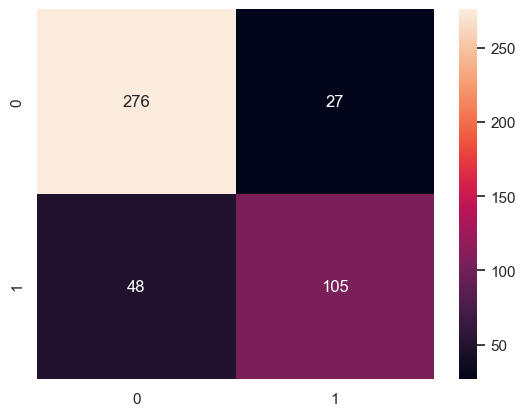

In [241]:
print(sns.heatmap(confusion_matrix(y_test, y_test_predict), annot=True , fmt="2g"))

AUC: 0.899


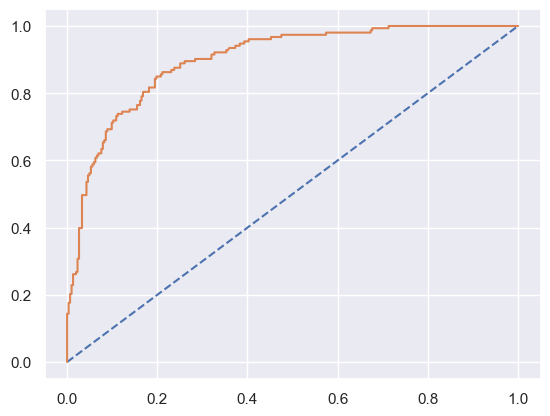

In [184]:
probs_test = gbc_model.predict_proba(x_test)

probs_test = probs_test[:, 1]

auc = roc_auc_score(y_test, probs_test)
print('AUC: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(test_fpr, test_tpr)